In [1]:
# Created by Joseph Chancey
# Hypothesis: Kills do not matter as much as objectives

In [2]:
# Import dependencies
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Path to datasets & store in Pandas DataFrame
m_df = pd.read_csv('../Data Files/Master_Ranked_Games.csv')
gm_df = pd.read_csv('../Data Files/GrandMaster_Ranked_Games.csv')
ch_df = pd.read_csv('../Data Files/Challenger_Ranked_Games.csv')
pd.set_option('display.max_columns', None)

In [4]:
m_df

,gameId,gameDuraton,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,blueTowerKills,blueInhibitorKills,blueWardPlaced,blueWardkills,blueKills,blueDeath,blueAssist,blueChampionDamageDealt,blueTotalGold,blueTotalMinionKills,blueTotalLevel,blueAvgLevel,blueJungleMinionKills,blueKillingSpree,blueTotalHeal,blueObjectDamageDealt,redWins,redFirstBlood,redFirstTower,redFirstBaron,redFirstDragon,redFirstInhibitor,redDragonKills,redBaronKills,redTowerKills,redInhibitorKills,redWardPlaced,redWardkills,redKills,redDeath,redAssist,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt
0,4227123625,1429,0,1,1,0,0,0,0,0,4,0,75,33,7,19,13,42979,41910,646,60,12.0,180,2,15575,35335,1,0,0,0,1,0,3,0,2,0,89,37,19,7,45,53831,41991,609,64,12.8,127,4,12916,26338
1,4219545724,1313,0,0,1,0,0,0,0,0,3,0,45,13,6,22,9,36087,35880,563,56,11.2,119,1,13059,26348,1,1,0,0,1,0,2,0,1,0,64,20,22,6,43,52924,39672,510,63,12.6,133,4,12252,29828
2,4219463634,1660,1,0,0,1,1,1,1,1,9,2,66,31,30,13,61,64708,58214,651,74,14.8,209,7,37288,64577,0,1,1,0,0,0,2,0,3,0,78,16,13,30,22,61745,46516,630,65,13.0,153,2,17005,37066
3,4205778093,984,1,1,1,0,1,0,2,0,5,0,55,9,26,3,34,45772,36545,402,53,10.6,102,6,14093,31303,0,0,0,0,0,0,0,0,0,0,33,11,3,26,5,25007,21444,304,41,8.2,51,1,10499,3085
4,4201063474,1437,0,1,1,0,1,0,2,0,3,0,75,23,19,24,22,79501,42395,528,60,12.0,96,5,23863,30643,1,0,0,0,0,0,1,0,4,0,70,32,23,19,39,71794,45798,565,68,13.6,150,7,47523,47150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107120,4216107910,2479,1,1,0,0,0,0,3,1,7,1,126,63,42,25,83,142725,82466,803,89,17.8,251,13,67496,98972,0,0,1,1,1,1,3,1,6,1,112,48,25,42,41,149798,72167,789,86,17.2,258,6,34890,62124
107121,4031558534,932,0,0,0,0,0,0,0,0,0,0,20,3,5,23,4,26093,23058,328,45,9.0,79,1,13559,4206,1,1,1,0,1,0,2,0,3,0,31,4,23,5,26,37534,32931,364,51,10.2,110,5,11983,31400
107122,3882136458,2081,0,1,1,0,0,0,1,0,6,0,91,44,25,37,36,80643,65433,764,78,15.6,206,7,30752,48581,1,0,0,1,1,1,4,2,9,3,109,40,37,25,68,97369,71576,797,85,17.0,222,8,33499,79612
107123,4137464714,1619,0,0,0,0,0,0,1,0,2,0,65,10,23,41,35,80053,44680,504,60,12.0,99,4,16526,19205,1,1,1,1,1,1,2,1,7,1,45,28,41,23,68,116262,59001,524,72,14.4,162,11,52292,60903


In [5]:
gm_df

,gameId,gameDuraton,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,blueTowerKills,blueInhibitorKills,blueWardPlaced,blueWardkills,blueKills,blueDeath,blueAssist,blueChampionDamageDealt,blueTotalGold,blueTotalMinionKills,blueTotalLevel,blueAvgLevel,blueJungleMinionKills,blueKillingSpree,blueTotalHeal,blueObjectDamageDealt,redWins,redFirstBlood,redFirstTower,redFirstBaron,redFirstDragon,redFirstInhibitor,redDragonKills,redBaronKills,redTowerKills,redInhibitorKills,redWardPlaced,redWardkills,redKills,redDeath,redAssist,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt
0,4241678498,2098,0,0,0,1,1,0,1,1,2,0,129,39,26,36,45,101607,63447,774,80,16.0,226,3,24718,31019,1,1,1,0,0,0,3,1,6,0,96,56,36,26,72,125866,70528,832,84,16.8,205,9,65312,88202
1,4233222221,1686,0,0,1,0,0,0,0,0,2,0,72,26,16,31,30,70270,47107,601,65,13.0,136,5,20503,31788,1,1,0,1,1,1,4,1,7,1,72,29,31,16,59,78424,58032,640,73,14.6,214,5,31415,61040
2,4233113995,1588,1,1,1,1,0,1,2,1,10,2,79,39,36,20,88,102449,59163,613,71,14.2,157,7,28612,67404,0,0,0,0,1,0,2,0,1,0,76,28,20,36,30,62134,47408,608,63,12.6,133,5,27846,32107
3,4229230455,1126,1,0,1,0,1,0,1,0,4,0,43,20,20,11,34,56652,39014,486,57,11.4,115,5,17630,37483,0,1,0,0,0,0,0,0,1,0,47,19,11,20,13,32999,32064,461,53,10.6,92,3,23511,10775
4,4228244819,1262,1,0,0,0,1,1,3,0,7,1,49,16,21,7,38,57342,42933,509,61,12.2,129,4,13040,48691,0,1,1,0,0,0,0,0,3,0,43,17,7,21,5,35272,35372,506,54,10.8,113,2,17891,24158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65891,3868504952,1928,0,1,0,0,0,0,2,0,3,0,88,40,25,37,40,97060,61378,771,76,15.2,177,4,23467,31943,1,0,1,1,1,1,3,1,9,2,99,38,37,25,60,94554,72361,804,80,16.0,209,10,57739,72450
65892,4110201724,1837,1,1,0,0,1,0,3,0,5,0,91,25,32,19,66,93059,58160,640,76,15.2,168,7,75427,60486,0,0,1,1,0,0,2,1,4,0,69,39,19,32,29,88366,52625,660,70,14.0,168,5,25003,45455
65893,4100240254,948,1,1,1,0,0,0,1,0,4,0,35,11,10,2,19,22427,30001,399,50,10.0,89,3,10791,24827,0,0,0,0,1,0,1,0,0,0,37,13,2,10,3,16574,20972,351,40,8.0,56,0,7138,6808
65894,4216107910,2479,1,1,0,0,0,0,3,1,7,1,126,63,42,25,83,142725,82466,803,89,17.8,251,13,67496,98972,0,0,1,1,1,1,3,1,6,1,112,48,25,42,41,149798,72167,789,86,17.2,258,6,34890,62124


In [6]:
ch_df

,gameId,gameDuraton,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,blueTowerKills,blueInhibitorKills,blueWardPlaced,blueWardkills,blueKills,blueDeath,blueAssist,blueChampionDamageDealt,blueTotalGold,blueTotalMinionKills,blueTotalLevel,blueAvgLevel,blueJungleMinionKills,blueKillingSpree,blueTotalHeal,blueObjectDamageDealt,redWins,redFirstBlood,redFirstTower,redFirstBaron,redFirstDragon,redFirstInhibitor,redDragonKills,redBaronKills,redTowerKills,redInhibitorKills,redWardPlaced,redWardkills,redKills,redDeath,redAssist,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt
0,4247263043,1323,0,1,0,0,0,0,0,0,0,0,38,13,15,31,22,56039,37001,440,56,11.2,105,4,31035,5675,1,0,1,0,1,1,3,0,9,1,50,17,31,15,68,73016,49832,533,64,12.8,138,8,38711,60463
1,4247155821,1317,1,0,0,0,1,0,2,0,4,0,57,18,19,8,31,60243,41072,531,63,12.6,111,3,26397,45303,0,1,1,0,0,0,0,0,2,0,46,18,8,19,8,44218,37136,571,59,11.8,134,3,24829,14105
2,4243963257,932,0,0,0,0,0,0,0,0,0,0,28,7,5,20,8,24014,22929,306,42,8.4,64,0,6567,5651,1,1,1,0,1,1,2,0,5,1,40,9,20,5,20,30797,35364,400,50,10.0,89,5,12589,45201
3,4241678498,2098,0,0,0,1,1,0,1,1,2,0,129,39,26,36,45,101607,63447,774,80,16.0,226,3,24718,31019,1,1,1,0,0,0,3,1,6,0,96,56,36,26,72,125866,70528,832,84,16.8,205,9,65312,88202
4,4241538868,2344,1,1,1,1,1,1,2,2,11,3,114,35,27,40,47,134826,74955,831,83,16.6,252,5,37161,95287,0,0,0,0,0,0,3,1,6,1,100,43,40,27,83,131536,74596,794,85,17.0,227,7,86431,64141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26899,4143231833,1468,0,1,0,0,0,0,1,0,0,0,72,20,24,28,50,99418,41437,438,60,12.0,106,8,20122,13309,1,0,1,0,1,0,2,0,4,0,52,29,27,24,40,75531,46558,478,64,12.8,141,6,48596,42733
26900,4157911901,970,0,1,1,0,1,0,3,0,5,1,37,2,29,42,36,61816,61221,346,65,13.0,28,5,32837,44640,1,0,0,0,0,1,0,0,10,2,43,0,40,29,31,99837,70177,455,72,14.4,136,11,15817,50217
26901,3764171638,1480,0,1,1,0,1,0,1,0,4,0,72,29,14,20,19,51604,45013,568,63,12.6,132,4,18131,45242,1,0,0,0,0,0,1,0,3,0,83,28,20,14,34,55214,48849,636,66,13.2,175,6,25448,27675
26902,4110201724,1837,1,1,0,0,1,0,3,0,5,0,91,25,32,19,66,93059,58160,640,76,15.2,168,7,75427,60486,0,0,1,1,0,0,2,1,4,0,69,39,19,32,29,88366,52625,660,70,14.0,168,5,25003,45455


## Ensure Data is Clean

- First we gather count on the data to check for missing values
- We will then separate the teams from one another 
- Create dataFrames to separate teams from their wins and losses for future analysis

In [7]:
# Check datasets for missing values
print(m_df.count())
print('-----------')
print(gm_df.count())
print('-----------')
print(ch_df.count())

gameId                     107125
gameDuraton                107125
blueWins                   107125
blueFirstBlood             107125
blueFirstTower             107125
blueFirstBaron             107125
blueFirstDragon            107125
blueFirstInhibitor         107125
blueDragonKills            107125
blueBaronKills             107125
blueTowerKills             107125
blueInhibitorKills         107125
blueWardPlaced             107125
blueWardkills              107125
blueKills                  107125
blueDeath                  107125
blueAssist                 107125
blueChampionDamageDealt    107125
blueTotalGold              107125
blueTotalMinionKills       107125
blueTotalLevel             107125
blueAvgLevel               107125
blueJungleMinionKills      107125
blueKillingSpree           107125
blueTotalHeal              107125
blueObjectDamageDealt      107125
redWins                    107125
redFirstBlood              107125
redFirstTower              107125
redFirstBaron 

In [8]:
# Sort and filter out Data for Wins - Blue
m_bluewins_df = m_df.loc[m_df["blueWins"] == 1, ["blueFirstBlood", "blueFirstTower", "blueFirstBaron",
                                                "blueFirstInhibitor", "blueDragonKills", "blueBaronKills",
                                                "blueTowerKills","blueInhibitorKills", "blueWardPlaced",
                                                "blueWardkills","blueKills","blueDeath","blueAssist",
                                                 "blueChampionDamageDealt","blueTotalGold","blueTotalMinionKills",
                                                 "blueTotalLevel","blueAvgLevel","blueObjectDamageDealt",
                                                "blueTotalHeal","blueKillingSpree","blueJungleMinionKills", "gameDuraton"]]
# Sort and filter out Data for Losses - Blue
m_blueloss_df = m_df.loc[m_df["blueWins"] == 0, ["blueFirstBlood", "blueFirstTower", "blueFirstBaron",
                                                "blueFirstInhibitor", "blueDragonKills", "blueBaronKills",
                                                "blueTowerKills","blueInhibitorKills", "blueWardPlaced",
                                                "blueWardkills","blueKills","blueDeath","blueAssist",
                                                 "blueChampionDamageDealt","blueTotalGold","blueTotalMinionKills",
                                                 "blueTotalLevel","blueAvgLevel","blueObjectDamageDealt",
                                                "blueTotalHeal","blueKillingSpree","blueJungleMinionKills", "gameDuraton"]]

# Sort and filter out Data for Wins - Red
m_redwins_df = m_df.loc[m_df["redWins"] == 1, ["redFirstBlood", "redFirstTower", "redFirstBaron",
                                                "redFirstInhibitor", "redDragonKills", "redBaronKills",
                                                "redTowerKills","redInhibitorKills", "redWardPlaced",
                                                "redWardkills","redKills","redDeath","redAssist",
                                                 "redChampionDamageDealt","redTotalGold","redTotalMinionKills",
                                                 "redTotalLevel","redAvgLevel","redObjectDamageDealt",
                                                "redTotalHeal","redKillingSpree","redJungleMinionKills", "gameDuraton"]]
# Sort and filter out Data for Losses - Red
m_redloss_df = m_df.loc[m_df["redWins"] == 0, ["redFirstBlood", "redFirstTower", "redFirstBaron",
                                                "redFirstInhibitor", "redDragonKills", "redBaronKills",
                                                "redTowerKills","redInhibitorKills", "redWardPlaced",
                                                "redWardkills","redKills","redDeath","redAssist",
                                                 "redChampionDamageDealt","redTotalGold","redTotalMinionKills",
                                                 "redTotalLevel","redAvgLevel","redObjectDamageDealt",
                                                "redTotalHeal","redKillingSpree","redJungleMinionKills", "gameDuraton"]]

m_blue_df =  m_df[["blueFirstBlood", "blueFirstTower", "blueFirstBaron",
                                                "blueFirstInhibitor", "blueDragonKills", "blueBaronKills",
                                                "blueTowerKills","blueInhibitorKills", "blueWardPlaced",
                                                "blueWardkills","blueKills","blueDeath","blueAssist",
                                                 "blueChampionDamageDealt","blueTotalGold","blueTotalMinionKills",
                                                 "blueTotalLevel","blueAvgLevel","blueObjectDamageDealt",
                                                "blueTotalHeal","blueKillingSpree","blueJungleMinionKills", "gameDuraton","blueWins"]]

m_red_df = m_df[["redFirstBlood", "redFirstTower", "redFirstBaron",
                                                "redFirstInhibitor", "redDragonKills", "redBaronKills",
                                                "redTowerKills","redInhibitorKills", "redWardPlaced",
                                                "redWardkills","redKills","redDeath","redAssist",
                                                 "redChampionDamageDealt","redTotalGold","redTotalMinionKills",
                                                 "redTotalLevel","redAvgLevel","redObjectDamageDealt",
                                                "redTotalHeal","redKillingSpree","redJungleMinionKills", "gameDuraton","redWins"]]

In [9]:
# Sort and filter out Data for Wins - Blue
gm_bluewins_df = gm_df.loc[gm_df["blueWins"] == 1, ["blueFirstBlood", "blueFirstTower", "blueFirstBaron",
                                                "blueFirstInhibitor", "blueDragonKills", "blueBaronKills",
                                                "blueTowerKills","blueInhibitorKills", "blueWardPlaced",
                                                "blueWardkills","blueKills","blueDeath","blueAssist",
                                                 "blueChampionDamageDealt","blueTotalGold","blueTotalMinionKills",
                                                 "blueTotalLevel","blueAvgLevel","blueObjectDamageDealt",
                                                "blueTotalHeal","blueKillingSpree","blueJungleMinionKills", "gameDuraton"]]
# Sort and filter out Data for Losses - Blue
gm_blueloss_df = gm_df.loc[gm_df["blueWins"] == 0, ["blueFirstBlood", "blueFirstTower", "blueFirstBaron",
                                                "blueFirstInhibitor", "blueDragonKills", "blueBaronKills",
                                                "blueTowerKills","blueInhibitorKills", "blueWardPlaced",
                                                "blueWardkills","blueKills","blueDeath","blueAssist",
                                                 "blueChampionDamageDealt","blueTotalGold","blueTotalMinionKills",
                                                 "blueTotalLevel","blueAvgLevel","blueObjectDamageDealt",
                                                "blueTotalHeal","blueKillingSpree","blueJungleMinionKills", "gameDuraton"]]

# Sort and filter out Data for Wins - Red
gm_redwins_df = gm_df.loc[gm_df["redWins"] == 1, ["redFirstBlood", "redFirstTower", "redFirstBaron",
                                                "redFirstInhibitor", "redDragonKills", "redBaronKills",
                                                "redTowerKills","redInhibitorKills", "redWardPlaced",
                                                "redWardkills","redKills","redDeath","redAssist",
                                                 "redChampionDamageDealt","redTotalGold","redTotalMinionKills",
                                                 "redTotalLevel","redAvgLevel","redObjectDamageDealt",
                                                "redTotalHeal","redKillingSpree","redJungleMinionKills", "gameDuraton"]]
# Sort and filter out Data for Losses - Red
gm_redloss_df = gm_df.loc[gm_df["redWins"] == 0, ["redFirstBlood", "redFirstTower", "redFirstBaron",
                                                "redFirstInhibitor", "redDragonKills", "redBaronKills",
                                                "redTowerKills","redInhibitorKills", "redWardPlaced",
                                                "redWardkills","redKills","redDeath","redAssist",
                                                 "redChampionDamageDealt","redTotalGold","redTotalMinionKills",
                                                 "redTotalLevel","redAvgLevel","redObjectDamageDealt",
                                                "redTotalHeal","redKillingSpree","redJungleMinionKills", "gameDuraton"]]

gm_blue_df = gm_df[["blueFirstBlood", "blueFirstTower", "blueFirstBaron",
                                                "blueFirstInhibitor", "blueDragonKills", "blueBaronKills",
                                                "blueTowerKills","blueInhibitorKills", "blueWardPlaced",
                                                "blueWardkills","blueKills","blueDeath","blueAssist",
                                                 "blueChampionDamageDealt","blueTotalGold","blueTotalMinionKills",
                                                 "blueTotalLevel","blueAvgLevel","blueObjectDamageDealt",
                                                "blueTotalHeal","blueKillingSpree","blueJungleMinionKills", "gameDuraton", "blueWins"]]

gm_red_df = gm_df[["redFirstBlood", "redFirstTower", "redFirstBaron",
                                                "redFirstInhibitor", "redDragonKills", "redBaronKills",
                                                "redTowerKills","redInhibitorKills", "redWardPlaced",
                                                "redWardkills","redKills","redDeath","redAssist",
                                                 "redChampionDamageDealt","redTotalGold","redTotalMinionKills",
                                                 "redTotalLevel","redAvgLevel","redObjectDamageDealt",
                                                "redTotalHeal","redKillingSpree","redJungleMinionKills", "gameDuraton", "redWins"]]

In [10]:
# Sort and filter out Data for Wins - Blue
ch_bluewins_df = m_df.loc[m_df["blueWins"] == 1, ["blueFirstBlood", "blueFirstTower", "blueFirstBaron",
                                                "blueFirstInhibitor", "blueDragonKills", "blueBaronKills",
                                                "blueTowerKills","blueInhibitorKills", "blueWardPlaced",
                                                "blueWardkills","blueKills","blueDeath","blueAssist",
                                                 "blueChampionDamageDealt","blueTotalGold","blueTotalMinionKills",
                                                 "blueTotalLevel","blueAvgLevel","blueObjectDamageDealt",
                                                "blueTotalHeal","blueKillingSpree","blueJungleMinionKills", "gameDuraton"]]
# Sort and filter out Data for Losses - Blue
ch_blueloss_df = ch_df.loc[ch_df["blueWins"] == 0, ["blueFirstBlood", "blueFirstTower", "blueFirstBaron",
                                                "blueFirstInhibitor", "blueDragonKills", "blueBaronKills",
                                                "blueTowerKills","blueInhibitorKills", "blueWardPlaced",
                                                "blueWardkills","blueKills","blueDeath","blueAssist",
                                                 "blueChampionDamageDealt","blueTotalGold","blueTotalMinionKills",
                                                 "blueTotalLevel","blueAvgLevel","blueObjectDamageDealt",
                                                "blueTotalHeal","blueKillingSpree","blueJungleMinionKills", "gameDuraton"]]

# Sort and filter out Data for Wins - Red
ch_redwins_df = ch_df.loc[ch_df["redWins"] == 1, ["redFirstBlood", "redFirstTower", "redFirstBaron",
                                                "redFirstInhibitor", "redDragonKills", "redBaronKills",
                                                "redTowerKills","redInhibitorKills", "redWardPlaced",
                                                "redWardkills","redKills","redDeath","redAssist",
                                                 "redChampionDamageDealt","redTotalGold","redTotalMinionKills",
                                                 "redTotalLevel","redAvgLevel","redObjectDamageDealt",
                                                "redTotalHeal","redKillingSpree","redJungleMinionKills", "gameDuraton"]]
# Sort and filter out Data for Losses - Red
ch_redloss_df = ch_df.loc[ch_df["redWins"] == 0, ["redFirstBlood", "redFirstTower", "redFirstBaron",
                                                "redFirstInhibitor", "redDragonKills", "redBaronKills",
                                                "redTowerKills","redInhibitorKills", "redWardPlaced",
                                                "redWardkills","redKills","redDeath","redAssist",
                                                 "redChampionDamageDealt","redTotalGold","redTotalMinionKills",
                                                 "redTotalLevel","redAvgLevel","redObjectDamageDealt",
                                                "redTotalHeal","redKillingSpree","redJungleMinionKills", "gameDuraton"]]

ch_blue_df = ch_df[["blueFirstBlood", "blueFirstTower", "blueFirstBaron",
                                                "blueFirstInhibitor", "blueDragonKills", "blueBaronKills",
                                                "blueTowerKills","blueInhibitorKills", "blueWardPlaced",
                                                "blueWardkills","blueKills","blueDeath","blueAssist",
                                                 "blueChampionDamageDealt","blueTotalGold","blueTotalMinionKills",
                                                 "blueTotalLevel","blueAvgLevel","blueObjectDamageDealt",
                                                "blueTotalHeal","blueKillingSpree","blueJungleMinionKills", "gameDuraton", "blueWins"]]

ch_red_df = ch_df[["redFirstBlood", "redFirstTower", "redFirstBaron",
                                                "redFirstInhibitor", "redDragonKills", "redBaronKills",
                                                "redTowerKills","redInhibitorKills", "redWardPlaced",
                                                "redWardkills","redKills","redDeath","redAssist",
                                                 "redChampionDamageDealt","redTotalGold","redTotalMinionKills",
                                                 "redTotalLevel","redAvgLevel","redObjectDamageDealt",
                                                "redTotalHeal","redKillingSpree","redJungleMinionKills", "gameDuraton", "redWins"]]

## Identifying Obvious Trends

By running the '.corr()' function, we can identify trends within the data that have a statistical signifiance in their influence of one another. 'blueWins' & 'redWins' are of primary interest to us, as their correlation coefficent value displayed below will point us in the right direction. We can then chart these columns against one another, and visualize the impact these variables have on a game's outcome. 

Statistical significance is defined as being above a 0.05 | As long as we are above this value, there is moderate statistical significance behind that correlation.

In [11]:
m_df.corr()

,gameId,gameDuraton,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,blueTowerKills,blueInhibitorKills,blueWardPlaced,blueWardkills,blueKills,blueDeath,blueAssist,blueChampionDamageDealt,blueTotalGold,blueTotalMinionKills,blueTotalLevel,blueAvgLevel,blueJungleMinionKills,blueKillingSpree,blueTotalHeal,blueObjectDamageDealt,redWins,redFirstBlood,redFirstTower,redFirstBaron,redFirstDragon,redFirstInhibitor,redDragonKills,redBaronKills,redTowerKills,redInhibitorKills,redWardPlaced,redWardkills,redKills,redDeath,redAssist,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt
gameId,1.000000,0.001328,-0.009713,-0.004008,-0.004157,-0.018107,-0.007425,-0.009885,0.028318,-0.019654,-0.021493,-0.016286,-0.023823,0.006087,-0.045984,-0.034666,-0.004343,-0.007889,-0.029827,-0.014825,-0.001094,-0.001094,0.010122,-0.035094,0.018291,0.000534,0.009713,0.003721,0.004832,-0.011160,0.005120,0.000362,0.029080,-0.014731,-0.005871,-0.007101,-0.023867,0.008325,-0.034682,-0.045764,0.001655,-0.004663,-0.023067,-0.009834,0.004138,0.004138,0.012887,-0.026526,0.020292,0.004728
gameDuraton,0.001328,1.000000,-0.020653,0.001113,0.046164,0.402575,0.091122,0.156593,0.494489,0.497172,0.391131,0.265883,0.822047,0.786135,0.402637,0.424629,0.349282,0.685676,0.765709,0.898920,0.750065,0.750065,0.787579,0.362824,0.713091,0.617244,0.020653,0.011759,0.022952,0.421149,0.137833,0.173353,0.528735,0.526533,0.414646,0.285871,0.822555,0.785793,0.425891,0.401731,0.366323,0.693182,0.772841,0.900673,0.755967,0.755967,0.785703,0.376685,0.718363,0.627111
blueWins,-0.009713,-0.020653,1.000000,0.208979,0.472211,0.369585,0.276402,0.668425,0.455406,0.355497,0.723008,0.583411,0.023395,0.062683,0.411674,-0.416598,0.328040,0.153082,0.248268,0.067803,0.192247,0.192247,0.201437,0.387202,0.192846,0.527904,-1.000000,-0.209282,-0.471455,-0.396186,-0.281737,-0.655057,-0.470271,-0.381315,-0.728810,-0.578057,-0.064839,-0.105124,-0.418711,0.409883,-0.332346,-0.173848,-0.275944,-0.109334,-0.221730,-0.221730,-0.247116,-0.397022,-0.220708,-0.557780
blueFirstBlood,-0.004008,0.001113,0.208979,1.000000,0.220634,0.050738,0.142845,0.157705,0.136477,0.043951,0.190511,0.124774,0.011472,0.018074,0.133469,-0.131250,0.084498,0.041193,0.078277,0.039860,0.051018,0.051018,0.056709,0.121124,0.034819,0.144270,-0.208979,-0.995472,-0.217003,-0.053048,-0.139146,-0.153816,-0.132382,-0.047441,-0.185847,-0.125912,-0.011357,-0.023312,-0.131909,0.132870,-0.086768,-0.041774,-0.077770,-0.034696,-0.051810,-0.051810,-0.056249,-0.126558,-0.035060,-0.143356
blueFirstTower,-0.004157,0.046164,0.472211,0.220634,1.000000,0.145523,0.224847,0.397007,0.298754,0.124413,0.496109,0.323699,0.063261,0.089292,0.263391,-0.224527,0.164791,0.115336,0.198912,0.118411,0.153919,0.153919,0.192193,0.255915,0.102505,0.386796,-0.472211,-0.216065,-0.974907,-0.124724,-0.196007,-0.367354,-0.245192,-0.100475,-0.442443,-0.304395,0.015503,-0.018827,-0.225775,0.262191,-0.138609,-0.071147,-0.127329,-0.026023,-0.068079,-0.068079,-0.124301,-0.227451,-0.053142,-0.324156
blueFirstBaron,-0.018107,0.402575,0.369585,0.050738,0.145523,1.000000,0.132850,0.410164,0.441767,0.886130,0.528847,0.414582,0.410335,0.404725,0.302841,-0.021204,0.231409,0.312299,0.423081,0.401575,0.385228,0.385228,0.484125,0.270866,0.380609,0.651391,-0.369585,-0.048218,-0.131539,-0.330128,-0.009593,-0.247938,0.048952,-0.208897,-0.134532,-0.189842,0.371147,0.315396,-0.021040,0.301816,-0.038391,0.177221,0.185923,0.387670,0.191596,0.191596,0.250734,-0.028374,0.178618,-0.003921
blueFirstDragon,-0.007425,0.091122,0.276402,0.142845,0.224847,0.132850,1.000000,0.186230,0.586899,0.123915,0.300609,0.141852,0.174994,0.133331,0.075192,-0.206693,-0.045051,0.002572,0.080543,0.190257,0.044485,0.044485,0.268259,0.058621,0.088643,0.356591,-0.276402,-0.139088,-0.205082,-0.036020,-0.802574,-0.197406,-0.355751,-0.024325,-0.185270,-0.170430,0.131

In [12]:
gm_df.corr()

,gameId,gameDuraton,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,blueTowerKills,blueInhibitorKills,blueWardPlaced,blueWardkills,blueKills,blueDeath,blueAssist,blueChampionDamageDealt,blueTotalGold,blueTotalMinionKills,blueTotalLevel,blueAvgLevel,blueJungleMinionKills,blueKillingSpree,blueTotalHeal,blueObjectDamageDealt,redWins,redFirstBlood,redFirstTower,redFirstBaron,redFirstDragon,redFirstInhibitor,redDragonKills,redBaronKills,redTowerKills,redInhibitorKills,redWardPlaced,redWardkills,redKills,redDeath,redAssist,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt
gameId,1.000000,-0.025042,-0.007960,-0.006417,-0.008420,-0.032824,-0.027225,-0.006222,-0.020071,-0.032693,-0.028450,-0.001489,-0.085142,-0.059394,-0.002356,0.005778,0.041245,0.018010,-0.016319,-0.070316,0.020008,0.020008,-0.050453,0.004141,0.009554,-0.036534,0.007960,0.006007,0.008165,-0.030389,-0.023637,0.002912,-0.018090,-0.034628,-0.018829,0.001598,-0.089577,-0.055136,0.005494,-0.002038,0.045765,0.021226,-0.011376,-0.063812,0.023790,0.023790,-0.046148,0.010232,0.012528,-0.033919
gameDuraton,-0.025042,1.000000,-0.018589,0.001533,0.048111,0.405861,0.094726,0.167544,0.494476,0.502119,0.407733,0.267784,0.820557,0.790085,0.361183,0.383753,0.304367,0.658466,0.753183,0.894718,0.724902,0.724902,0.781414,0.325677,0.705465,0.629790,0.018589,0.010565,0.019031,0.425957,0.148562,0.177137,0.529871,0.532219,0.426744,0.286413,0.821300,0.792174,0.385130,0.360233,0.318131,0.665034,0.760239,0.896487,0.731250,0.731250,0.780910,0.336922,0.708775,0.638573
blueWins,-0.007960,-0.018589,1.000000,0.202711,0.459949,0.361664,0.264384,0.650728,0.449474,0.348685,0.712080,0.567115,0.025605,0.062112,0.417313,-0.418523,0.328821,0.157634,0.252460,0.066309,0.196436,0.196436,0.192385,0.388864,0.198491,0.513225,-1.000000,-0.203157,-0.460805,-0.388301,-0.269935,-0.637846,-0.457600,-0.375097,-0.717318,-0.563791,-0.058309,-0.094832,-0.420711,0.415183,-0.329962,-0.170559,-0.272955,-0.097746,-0.219181,-0.219181,-0.231321,-0.398132,-0.223106,-0.541666
blueFirstBlood,-0.006417,0.001533,0.202711,1.000000,0.212475,0.056349,0.140685,0.153840,0.135139,0.048366,0.190685,0.126303,0.012455,0.016029,0.136422,-0.131195,0.087024,0.042175,0.079352,0.035868,0.052070,0.052070,0.054134,0.124708,0.034178,0.143555,-0.202711,-0.995789,-0.208685,-0.054010,-0.135567,-0.145371,-0.128862,-0.042670,-0.177440,-0.115313,-0.012975,-0.020474,-0.131935,0.135612,-0.087672,-0.042025,-0.075427,-0.029869,-0.048723,-0.048723,-0.051263,-0.124470,-0.038480,-0.136138
blueFirstTower,-0.008420,0.048111,0.459949,0.212475,1.000000,0.138477,0.204402,0.377750,0.288639,0.115972,0.480995,0.306767,0.063304,0.088816,0.263074,-0.225953,0.165958,0.114780,0.196886,0.113391,0.152713,0.152713,0.185913,0.253386,0.102541,0.373510,-0.459949,-0.208195,-0.975995,-0.116154,-0.175836,-0.354673,-0.233370,-0.092168,-0.428209,-0.291519,0.019560,-0.011865,-0.227296,0.261696,-0.140230,-0.070251,-0.124560,-0.015324,-0.064355,-0.064355,-0.111952,-0.227905,-0.055976,-0.311200
blueFirstBaron,-0.032824,0.405861,0.361664,0.056349,0.138477,1.000000,0.130357,0.400443,0.435059,0.884712,0.528228,0.395476,0.415372,0.407263,0.273077,-0.044579,0.199575,0.291210,0.410693,0.405811,0.370094,0.370094,0.483592,0.241085,0.374928,0.647648,-0.361664,-0.054018,-0.125185,-0.325291,0.006521,-0.233430,0.068908,-0.205013,-0.118463,-0.183123,0.375889,0.326334,-0.044386,0.271997,-0.064030,0.159407,0.175516,0.393394,0.176030,0.176030,0.266921,-0.051591,0.171018,0.015274
blueFirstDragon,-0.027225,0.094726,0.264384,0.140685,0.204402,0.130357,1.000000,0.166439,0.587881,0.122767,0.287008,0.116337,0.186706,0.146369,0.047797,-0.226168,-0.070973,-0.017727,0.061388,0.200573,0.021650,0.021650,0.277261,0.031642,0.080419,0.351789,-0.264384,-0.137283,-0.186288,-0.023483,-0.782165,-0.192399,-0.337448,-0.012198,-0.166153,-0.165999,0.147

In [13]:
ch_df.corr()

,gameId,gameDuraton,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,blueTowerKills,blueInhibitorKills,blueWardPlaced,blueWardkills,blueKills,blueDeath,blueAssist,blueChampionDamageDealt,blueTotalGold,blueTotalMinionKills,blueTotalLevel,blueAvgLevel,blueJungleMinionKills,blueKillingSpree,blueTotalHeal,blueObjectDamageDealt,redWins,redFirstBlood,redFirstTower,redFirstBaron,redFirstDragon,redFirstInhibitor,redDragonKills,redBaronKills,redTowerKills,redInhibitorKills,redWardPlaced,redWardkills,redKills,redDeath,redAssist,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt
gameId,1.000000,-0.025468,-0.005385,-0.010942,0.004411,-0.023029,-0.015300,-0.006665,-0.013351,-0.022253,-0.019476,0.000894,-0.083464,-0.052451,-0.015259,-0.014959,0.027355,0.009712,-0.027175,-0.062907,0.005506,0.005506,-0.035970,-0.004878,0.007881,-0.026895,0.005385,0.010233,-0.006565,-0.034905,-0.022539,-0.001674,-0.022303,-0.038990,-0.020629,-0.002763,-0.081666,-0.061250,-0.014943,-0.015083,0.031041,0.011027,-0.026877,-0.058942,0.007164,0.007164,-0.038405,-0.008652,0.012081,-0.036889
gameDuraton,-0.025468,1.000000,-0.001414,-0.002982,0.055433,0.395313,0.079317,0.207592,0.480537,0.501499,0.431296,0.293628,0.840685,0.804957,0.366724,0.374059,0.337086,0.684659,0.776835,0.900700,0.755377,0.755377,0.799519,0.326444,0.705497,0.640389,0.001414,0.014910,0.011624,0.417492,0.126008,0.201119,0.513461,0.528711,0.429695,0.294642,0.840759,0.806386,0.374961,0.365549,0.342904,0.686816,0.777556,0.903212,0.759482,0.759482,0.796047,0.335574,0.706917,0.635481
blueWins,-0.005385,-0.001414,1.000000,0.206442,0.449065,0.366722,0.267778,0.637521,0.466442,0.355048,0.708405,0.554367,0.037542,0.070485,0.453521,-0.439782,0.372974,0.180180,0.276481,0.078853,0.226127,0.226127,0.207726,0.420451,0.215695,0.525094,-1.000000,-0.207341,-0.446742,-0.394066,-0.267998,-0.622811,-0.467407,-0.381037,-0.709306,-0.547457,-0.050044,-0.087605,-0.441799,0.451537,-0.356230,-0.173693,-0.270733,-0.083117,-0.215335,-0.215335,-0.231264,-0.411601,-0.222140,-0.548136
blueFirstBlood,-0.010942,-0.002982,0.206442,1.000000,0.209255,0.057685,0.133711,0.146766,0.135553,0.047449,0.182879,0.120126,0.007325,0.013368,0.131871,-0.152955,0.082355,0.033446,0.068347,0.029703,0.045685,0.045685,0.056812,0.123159,0.021933,0.138878,-0.206442,-0.995993,-0.206566,-0.061839,-0.127026,-0.140193,-0.137315,-0.053675,-0.180775,-0.115754,-0.015520,-0.024865,-0.153660,0.131082,-0.102884,-0.061781,-0.090844,-0.030316,-0.057688,-0.057688,-0.056519,-0.143134,-0.043987,-0.147183
blueFirstTower,0.004411,0.055433,0.449065,0.209255,1.000000,0.134875,0.195663,0.344918,0.286556,0.112454,0.466119,0.287067,0.066665,0.092676,0.274319,-0.232112,0.181827,0.125737,0.205284,0.115147,0.165176,0.165176,0.189967,0.265503,0.110765,0.371794,-0.449065,-0.205037,-0.976836,-0.115343,-0.166657,-0.319866,-0.234265,-0.087375,-0.414710,-0.266283,0.023182,-0.010243,-0.233292,0.272922,-0.140172,-0.067617,-0.120010,-0.006552,-0.053443,-0.053443,-0.110690,-0.227322,-0.047059,-0.309297
blueFirstBaron,-0.023029,0.395313,0.366722,0.057685,0.134875,1.000000,0.116563,0.424044,0.403234,0.880056,0.529667,0.407331,0.399604,0.387845,0.299192,-0.047177,0.242308,0.313691,0.428876,0.387380,0.397201,0.397201,0.470242,0.263772,0.376371,0.633739,-0.366722,-0.055406,-0.121773,-0.342623,-0.012061,-0.225692,0.050167,-0.218780,-0.124365,-0.175491,0.359896,0.311173,-0.047412,0.298074,-0.053746,0.172979,0.180171,0.373894,0.187407,0.187407,0.248108,-0.048145,0.164696,-0.005932
blueFirstDragon,-0.015300,0.079317,0.267778,0.133711,0.195663,0.116563,1.000000,0.163540,0.583926,0.108725,0.267873,0.115988,0.156538,0.120762,0.081948,-0.218187,-0.023811,0.006938,0.077442,0.168549,0.042150,0.042150,0.243731,0.061190,0.085937,0.328543,-0.267778,-0.130395,-0.177497,-0.040840,-0.833177,-0.178384,-0.392175,-0.029286,-0.170506,-0.15158

## Which Team Won More?

- Is there a blatant disparity between games won/lost depending on which team you are on?
- What is the percentage of wins per side?
- Are any trends carried over to other ranks? (master, grand master, challenger)

Blue won a total of 53041 matches.
Red won a total of 54084 matches.
The difference is 1043 - in favor of the Red team.
Percentage of wins for blue is: 0.495%
Percentage of wins for red is: 0.505%


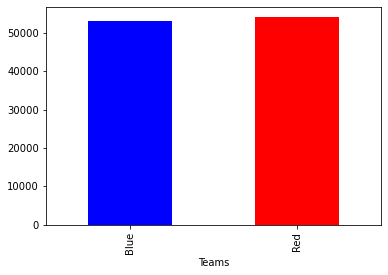

In [14]:
# DataFrame for Master Elo Wins RED/BLUE
m_win_diff = m_df[['gameId', 'blueWins', 'redWins']]
m_win_diff.set_index('gameId')

# Sum Totals
master_elo_win_sum_blue = m_win_diff['blueWins'].sum()
master_elo_win_sum_red = m_win_diff['redWins'].sum()

# Average Totals
master_elo_win_avg_blue = m_win_diff['blueWins'].mean()
# Rround Blue
master_elo_win_avg_blue = round(master_elo_win_avg_blue, 3)
# Round Red
master_elo_win_avg_red = m_win_diff['redWins'].mean()
master_elo_win_avg_red = round(master_elo_win_avg_red, 3)

# Store data in a dictionary
master_sumwin_data = [['Blue', master_elo_win_sum_blue], ['Red', master_elo_win_sum_red]]
# Create coloumn names 
master_column_names = ['Teams', 'Win Count']
# Create DataFrame with the two lines above for sum totals
master_elo_sum_wins_total = pd.DataFrame(master_sumwin_data, columns=master_column_names)

# Calculate difference
master_win_diff = master_elo_win_sum_red - master_elo_win_sum_blue

# Display Results
print(f'Blue won a total of {master_elo_win_sum_blue} matches.')
print(f'Red won a total of {master_elo_win_sum_red} matches.')
print(f'The difference is {master_win_diff} - in favor of the Red team.')
print(f'Percentage of wins for blue is: {master_elo_win_avg_blue}%')
print(f'Percentage of wins for red is: {master_elo_win_avg_red}%')

# Display Bar Chart of win totals results
master_bar_plot_wins = master_elo_sum_wins_total.plot.bar(x='Teams', y='Win Count', color=['blue','red'], legend=False)

Blue won a total of 32659 matches.
Red won a total of 33237 matches.
The difference is 578 - in favor of the Red team.
Percentage of wins for blue is: 0.496%
Percentage of wins for red is: 0.504%


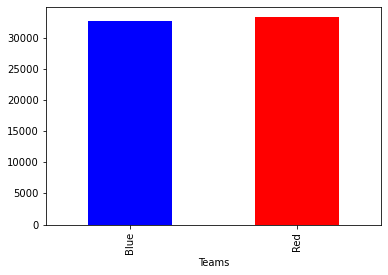

In [15]:
# DataFrame for Grand Master Elo Wins RED/BLUE
gm_win_diff = gm_df[['gameId', 'blueWins', 'redWins']]
gm_win_diff.set_index('gameId')

# Sum Totals
gmaster_elo_win_sum_blue = gm_win_diff['blueWins'].sum()
gmaster_elo_win_sum_red = gm_win_diff['redWins'].sum()

# Average Totals
gmaster_elo_win_avg_blue = gm_win_diff['blueWins'].mean()
# Rround Blue
gmaster_elo_win_avg_blue = round(gmaster_elo_win_avg_blue, 3)
# Round Red
gmaster_elo_win_avg_red = gm_win_diff['redWins'].mean()
gmaster_elo_win_avg_red = round(gmaster_elo_win_avg_red, 3)

# Store data in a dictionary
gmaster_sumwin_data = [['Blue', gmaster_elo_win_sum_blue], ['Red', gmaster_elo_win_sum_red]]
# Create coloumn names 
gmaster_column_names = ['Teams', 'Win Count']
# Create DataFrame with the two lines above for sum totals
gmaster_elo_sum_wins_total = pd.DataFrame(gmaster_sumwin_data, columns=gmaster_column_names)

# Calculate difference
gmaster_win_diff = gmaster_elo_win_sum_red - gmaster_elo_win_sum_blue

# Display Results
print(f'Blue won a total of {gmaster_elo_win_sum_blue} matches.')
print(f'Red won a total of {gmaster_elo_win_sum_red} matches.')
print(f'The difference is {gmaster_win_diff} - in favor of the Red team.')
print(f'Percentage of wins for blue is: {gmaster_elo_win_avg_blue}%')
print(f'Percentage of wins for red is: {gmaster_elo_win_avg_red}%')

# Display Bar Chart of win totals results
gmaster_bar_plot_wins = gmaster_elo_sum_wins_total.plot.bar(x='Teams', y='Win Count', color=['blue','red'],  legend=False)

Blue won a total of 13454 matches.
Red won a total of 13450 matches.
The difference is 4 - in favor of the Blue team.
Percentage of wins for blue is: 0.50007%
Percentage of wins for red is: 0.49993%


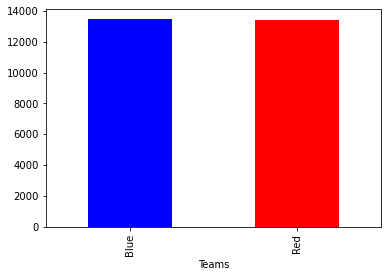

In [16]:
# DataFrame for Challenger Elo Wins RED/BLUE
ch_win_diff = ch_df[['gameId', 'blueWins', 'redWins']]
ch_win_diff.set_index('gameId')

# Sum Totals
ch_elo_win_sum_blue = ch_win_diff['blueWins'].sum()
ch_elo_win_sum_red = ch_win_diff['redWins'].sum()

# Average Totals
ch_elo_win_avg_blue = ch_win_diff['blueWins'].mean()
# Rround Blue
ch_elo_win_avg_blue = round(ch_elo_win_avg_blue, 5)
# Round Red
ch_elo_win_avg_red = ch_win_diff['redWins'].mean()
ch_elo_win_avg_red = round(ch_elo_win_avg_red, 5)

# Store data in a dictionary
ch_sumwin_data = [['Blue', ch_elo_win_sum_blue], ['Red', ch_elo_win_sum_red]]
# Create coloumn names 
ch_column_names = ['Teams', 'Win Count']
# Create DataFrame with the two lines above for sum totals
ch_elo_sum_wins_total = pd.DataFrame(ch_sumwin_data, columns=ch_column_names)

# Calculate difference
ch_win_diff = ch_elo_win_sum_blue - ch_elo_win_sum_red

# Display Results
print(f'Blue won a total of {ch_elo_win_sum_blue} matches.')
print(f'Red won a total of {ch_elo_win_sum_red} matches.')
print(f'The difference is {ch_win_diff} - in favor of the Blue team.')
print(f'Percentage of wins for blue is: {ch_elo_win_avg_blue}%')
print(f'Percentage of wins for red is: {ch_elo_win_avg_red}%')

# Display Bar Chart of win totals results
ch_bar_plot_wins = ch_elo_sum_wins_total.plot.bar(x='Teams', y='Win Count', color=['blue','red'], legend=False)

## Gold Income vs. Game Length

- Does gold income have a plateau? 
- Is there any sort of disparity between teams? 
- Lost games vs. Won games? 
- Compare the distribution of the total games (both teams) to the distribution of just one team's metrics. Anything of note?

Text(0.5, 1.0, 'Total Master Games - Gold/Time')

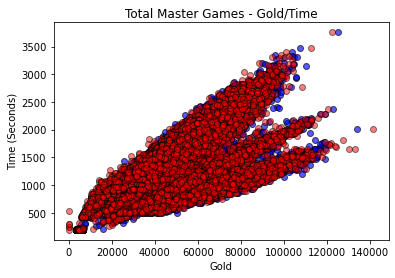

In [17]:
# Plot Game Length vs Gold Income - Master Games

m_df['totalGoldDiff'] = m_df['redTotalGold'] - m_df['blueTotalGold']

master_length_wins_df = m_df[['gameId', 'blueWins', 'redWins', 'blueTotalGold', 'gameDuraton', 'redTotalGold']]

# Plot Total Red/Blue game duration against income
plt.scatter(master_length_wins_df['blueTotalGold'], master_length_wins_df['gameDuraton'], marker="o", facecolors="blue", edgecolors="black", alpha=0.65)
plt.scatter(master_length_wins_df['redTotalGold'], master_length_wins_df['gameDuraton'], marker="o", facecolors="red", edgecolors="black", alpha=0.50)
plt.xlabel('Gold')
plt.ylabel('Time (Seconds)')
plt.title('Total Master Games - Gold/Time')

Text(0.5, 1.0, 'Won Master Games - Gold/Time')

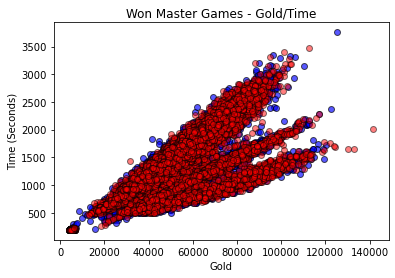

In [18]:
# Plot Game Length vs Gold Income

m_df['totalGoldDiff'] = m_df['redTotalGold'] - m_df['blueTotalGold']

master_length_wins_df = m_df[['gameId', 'blueWins', 'redWins', 'blueTotalGold', 'gameDuraton', 'redTotalGold']]

# Compare income over time in winning games 
master_wins_b_rIncome_plot = plt.scatter(m_bluewins_df['blueTotalGold'], m_bluewins_df['gameDuraton'], marker="o", facecolors="blue", edgecolors="black", alpha=0.65)
master_wins_b_rIncome_plot = plt.scatter(m_redwins_df['redTotalGold'], m_redwins_df['gameDuraton'], marker="o", facecolors="red", edgecolors="black", alpha=0.50)
plt.xlabel('Gold')
plt.ylabel('Time (Seconds)')
plt.title('Won Master Games - Gold/Time')

Text(0.5, 1.0, 'Lost Master Games - Gold/Time')

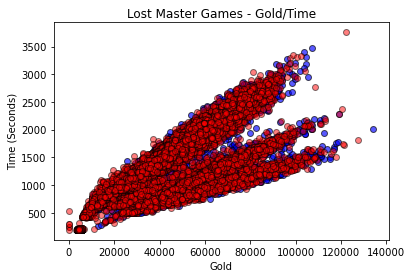

In [19]:
# Compare income over time in lost games 
master_loss_b_rIncome_plot = plt.scatter(m_blueloss_df['blueTotalGold'], m_blueloss_df['gameDuraton'], marker="o", facecolors="blue", edgecolors="black", alpha=0.65)
master_loss_b_rIncome_plot = plt.scatter(m_redloss_df['redTotalGold'], m_redloss_df['gameDuraton'], marker="o", facecolors="red", edgecolors="black", alpha=0.50)
plt.xlabel('Gold')
plt.ylabel('Time (Seconds)')
plt.title('Lost Master Games - Gold/Time')

In [20]:
# Below are Grand Master Charts
print('----------------------')

----------------------


Text(0.5, 1.0, 'Total Grand Master Games - Gold/Time')

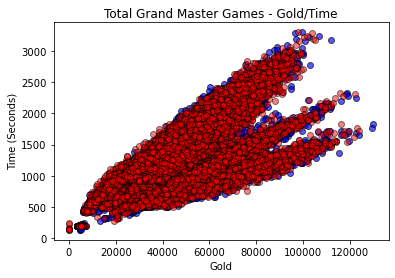

In [21]:
# Plot Game Length vs Gold Income TOTAL - Grand Master

gm_df['totalGoldDiff'] = gm_df['redTotalGold'] - gm_df['blueTotalGold']

gmaster_length_wins_df = gm_df[['gameId', 'blueWins', 'redWins', 'blueTotalGold', 'gameDuraton', 'redTotalGold']]

# Plot Total Red/Blue game duration against income
plt.scatter(gmaster_length_wins_df['blueTotalGold'], gmaster_length_wins_df['gameDuraton'], marker="o", facecolors="blue", edgecolors="black", alpha=0.65)
plt.scatter(gmaster_length_wins_df['redTotalGold'], gmaster_length_wins_df['gameDuraton'], marker="o", facecolors="red", edgecolors="black", alpha=0.50)
plt.xlabel('Gold')
plt.ylabel('Time (Seconds)')
plt.title('Total Grand Master Games - Gold/Time')

Text(0.5, 1.0, 'Won Grand Master Games - Gold/Time')

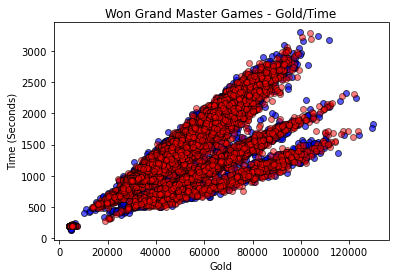

In [22]:
# Plot Game Length vs Gold Income WINS - Grand Master

gm_df['totalGoldDiff'] = gm_df['redTotalGold'] - gm_df['blueTotalGold']

gmaster_length_wins_df = gm_df[['gameId', 'blueWins', 'redWins', 'blueTotalGold', 'gameDuraton', 'redTotalGold']]

# Compare income over time in winning games 
gmaster_wins_b_rIncome_plot = plt.scatter(gm_bluewins_df['blueTotalGold'], gm_bluewins_df['gameDuraton'], marker="o", facecolors="blue", edgecolors="black", alpha=0.65)
gmaster_wins_b_rIncome_plot = plt.scatter(gm_redwins_df['redTotalGold'], gm_redwins_df['gameDuraton'], marker="o", facecolors="red", edgecolors="black", alpha=0.50)
plt.xlabel('Gold')
plt.ylabel('Time (Seconds)')
plt.title('Won Grand Master Games - Gold/Time')

Text(0.5, 1.0, 'Lost Grand Master Games - Gold/Time')

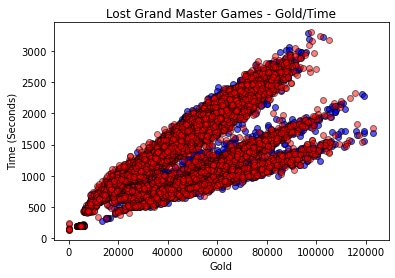

In [23]:
# Compare income over time in LOST games - Grand Master
gmaster_loss_b_rIncome_plot = plt.scatter(gm_blueloss_df['blueTotalGold'], gm_blueloss_df['gameDuraton'], marker="o", facecolors="blue", edgecolors="black", alpha=0.65)
gmaster_loss_b_rIncome_plot = plt.scatter(gm_redloss_df['redTotalGold'], gm_redloss_df['gameDuraton'], marker="o", facecolors="red", edgecolors="black", alpha=0.50)
plt.xlabel('Gold')
plt.ylabel('Time (Seconds)')
plt.title('Lost Grand Master Games - Gold/Time')

In [24]:
# Below are Challenger  Charts
print('----------------------')

----------------------


Text(0.5, 1.0, 'Total Challenger Games - Gold/Time')

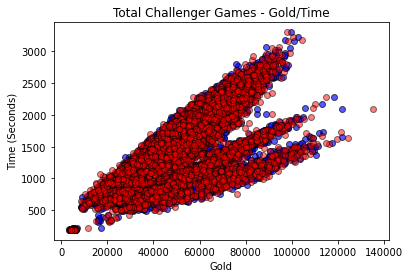

In [25]:
# Plot Game Length vs Gold Income TOTAL - Challenger

ch_df['totalGoldDiff'] = ch_df['redTotalGold'] - ch_df['blueTotalGold']

ch_length_wins_df = ch_df[['gameId', 'blueWins', 'redWins', 'blueTotalGold', 'gameDuraton', 'redTotalGold']]

# Plot Total Red/Blue game duration against income
plt.scatter(ch_length_wins_df['blueTotalGold'], ch_length_wins_df['gameDuraton'], marker="o", facecolors="blue", edgecolors="black", alpha=0.65)
plt.scatter(ch_length_wins_df['redTotalGold'], ch_length_wins_df['gameDuraton'], marker="o", facecolors="red", edgecolors="black", alpha=0.50)
plt.xlabel('Gold')
plt.ylabel('Time (Seconds)')
plt.title('Total Challenger Games - Gold/Time')

Text(0.5, 1.0, 'Won Challenger Games - Gold/Time')

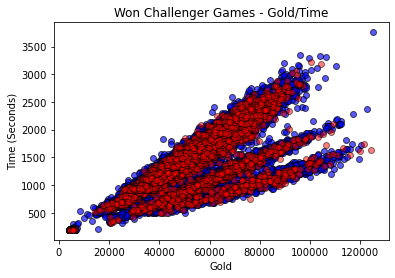

In [26]:
# Plot Game Length vs Gold Income WINS - Grand Master

ch_df['totalGoldDiff'] = ch_df['redTotalGold'] - ch_df['blueTotalGold']

ch_length_wins_df = ch_df[['gameId', 'blueWins', 'redWins', 'blueTotalGold', 'gameDuraton', 'redTotalGold']]

# Compare income over time in winning games 
ch_wins_b_rIncome_plot = plt.scatter(ch_bluewins_df['blueTotalGold'], ch_bluewins_df['gameDuraton'], marker="o", facecolors="blue", edgecolors="black", alpha=0.65)
ch_wins_b_rIncome_plot = plt.scatter(ch_redwins_df['redTotalGold'], ch_redwins_df['gameDuraton'], marker="o", facecolors="red", edgecolors="black", alpha=0.50)
plt.xlabel('Gold')
plt.ylabel('Time (Seconds)')
plt.title('Won Challenger Games - Gold/Time')

Text(0.5, 1.0, 'Lost Challenger Games - Gold/Time')

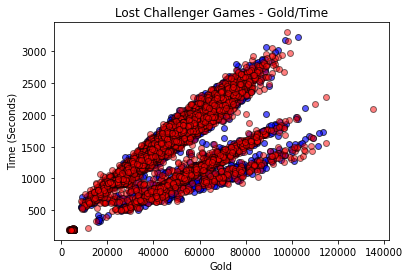

In [27]:
# Compare income over time in LOST games - Challenger
ch_loss_b_rIncome_plot = plt.scatter(ch_blueloss_df['blueTotalGold'], ch_blueloss_df['gameDuraton'], marker="o", facecolors="blue", edgecolors="black", alpha=0.65)
ch_loss_b_rIncome_plot = plt.scatter(ch_redloss_df['redTotalGold'], ch_redloss_df['gameDuraton'], marker="o", facecolors="red", edgecolors="black", alpha=0.50)
plt.xlabel('Gold')
plt.ylabel('Time (Seconds)')
plt.title('Lost Challenger Games - Gold/Time')

## Frequency Distribution of Each Team's Dragon Kills vs. Games Won

- Does getting Dragon impact a game?
- What is the average Dragons killed in won games for both red and blue?

Average dragon kills for blue wins: 1.937 Dragons
Average dragon kills for blue losses: 0.792 Dragons


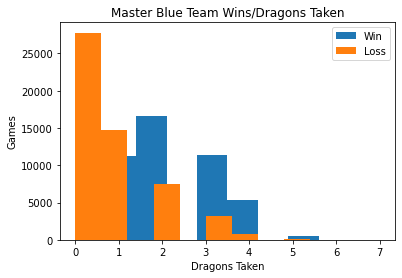

In [28]:
# Histogram on Blue Dragon Kills for Wins Against Losses- Master
plt.hist(m_bluewins_df.blueDragonKills, label="Win")
plt.hist(m_blueloss_df.blueDragonKills, label="Loss")
plt.legend(loc="upper right")
print(f"Average dragon kills for blue wins: {round(m_bluewins_df['blueDragonKills'].mean(), 3)} Dragons")
print(f"Average dragon kills for blue losses: {round(m_blueloss_df['blueDragonKills'].mean(), 3)} Dragons")
plt.xlabel('Dragons Taken')
plt.ylabel('Games')
plt.title('Master Blue Team Wins/Dragons Taken')

plt.savefig('../Images/master_blue_histo_dragons.png')

Average dragon kills for red wins: 2.126 Dragons
Average dragon kills for red losses: 0.894 Dragons


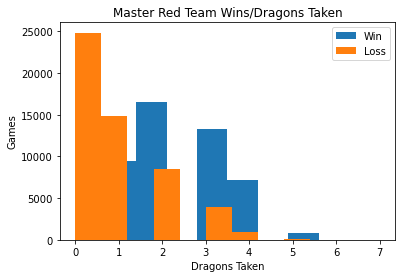

In [29]:
# Report on Red Dragon Kills for Wins Against Losses - Master
plt.hist(m_redwins_df.redDragonKills, label="Win")
plt.hist(m_redloss_df.redDragonKills, label="Loss")
plt.legend(loc="upper right")
print(f"Average dragon kills for red wins: {round(m_redwins_df['redDragonKills'].mean(), 3)} Dragons")
print(f"Average dragon kills for red losses: {round(m_redloss_df['redDragonKills'].mean(), 3)} Dragons")
plt.xlabel('Dragons Taken')
plt.ylabel('Games')
plt.title('Master Red Team Wins/Dragons Taken')

plt.savefig('../Images/master_red_histo_dragons.png')

Average dragon kills for blue wins: 1.907 Dragons
Average dragon kills for blue losses: 0.781 Dragons


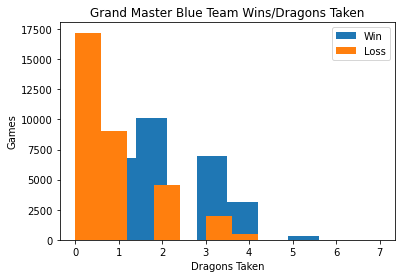

In [30]:
# Report on Blue Dragon Kills for Wins Against Losses - Grand Master
plt.hist(gm_bluewins_df.blueDragonKills, label="Win")
plt.hist(gm_blueloss_df.blueDragonKills, label="Loss")
plt.legend(loc="upper right")
plt.figsize=(18,18)
print(f"Average dragon kills for blue wins: {round(gm_bluewins_df['blueDragonKills'].mean(), 3)} Dragons")
print(f"Average dragon kills for blue losses: {round(gm_blueloss_df['blueDragonKills'].mean(), 3)} Dragons")
plt.xlabel('Dragons Taken')
plt.ylabel('Games')
plt.title('Grand Master Blue Team Wins/Dragons Taken')

plt.savefig('../Images/grandmaster_blue_histo_dragons.png')

Average dragon kills for red wins: 2.099 Dragons
Average dragon kills for red losses: 0.901 Dragons


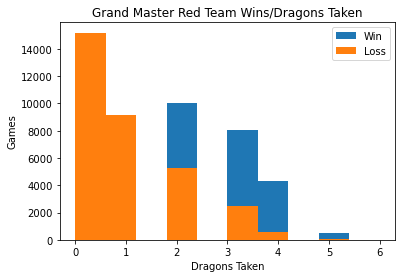

In [31]:
# Report on Red Dragon Kills for Wins Against Losses - Grand Master
plt.hist(gm_redwins_df.redDragonKills, label="Win")
plt.hist(gm_redloss_df.redDragonKills, label="Loss")
plt.legend(loc="upper right")
print(f"Average dragon kills for red wins: {round(gm_redwins_df['redDragonKills'].mean(), 3)} Dragons")
print(f"Average dragon kills for red losses: {round(gm_redloss_df['redDragonKills'].mean(), 3)} Dragons")
plt.xlabel('Dragons Taken')
plt.ylabel('Games')
plt.title('Grand Master Red Team Wins/Dragons Taken')

plt.savefig('../Images/grandmaster_red_histo_dragons.png')

Average dragon kills for blue wins: 1.937 Dragons
Average dragon kills for blue losses: 0.808 Dragons


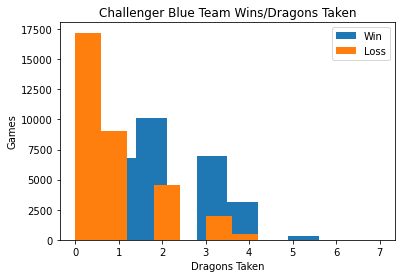

In [32]:
# Report on Blue Dragon Kills for Wins Against Losses - Challenger
plt.hist(gm_bluewins_df.blueDragonKills, label="Win")
plt.hist(gm_blueloss_df.blueDragonKills, label="Loss")

plt.legend(loc="upper right")

print(f"Average dragon kills for blue wins: {round(ch_bluewins_df['blueDragonKills'].mean(), 3)} Dragons")
print(f"Average dragon kills for blue losses: {round(ch_blueloss_df['blueDragonKills'].mean(), 3)} Dragons")

plt.xlabel('Dragons Taken')
plt.ylabel('Games')
plt.title('Challenger Blue Team Wins/Dragons Taken')

plt.savefig('../Images/challenger_blue_histo_dragons.png')

Average dragon kills for red wins: 2.171 Dragons
Average dragon kills for red losses: 0.957 Dragons


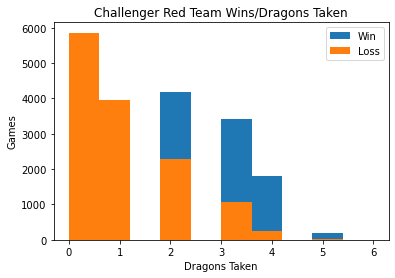

In [33]:
# Report on Red Dragon Kills for Wins Against Losses - Challenger

plt.hist(ch_redwins_df.redDragonKills, label="Win")
plt.hist(ch_redloss_df.redDragonKills, label="Loss")

plt.legend(loc="upper right")

print(f"Average dragon kills for red wins: {round(ch_redwins_df['redDragonKills'].mean(), 3)} Dragons")
print(f"Average dragon kills for red losses: {round(ch_redloss_df['redDragonKills'].mean(), 3)} Dragons")

plt.xlabel('Dragons Taken')
plt.ylabel('Games')
plt.title('Challenger Red Team Wins/Dragons Taken')

plt.savefig('../Images/challenger_red_histo_dragons.png')

## Frequency Distribution of Towers Taken by Each Team in Each Rank

- What is the average amount of towers taken by red/blue team in their winning games? Losing Games?
- What does the histogram reveal about towers taken and a game's win chance? 

Average Towers taken for blue wins: 6.829 Towers
Average Towers taken for blue losses: 1.91 Towers


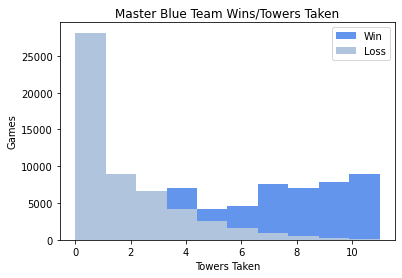

In [34]:
# Histogram on Towers Taken for Wins Against Losses Blue - Master
plt.hist(m_bluewins_df.blueTowerKills, label="Win", color='cornflowerblue')
plt.hist(m_blueloss_df.blueTowerKills, label="Loss", color='lightsteelblue')
plt.legend(loc="upper right")
print(f"Average Towers taken for blue wins: {round(m_bluewins_df['blueTowerKills'].mean(), 3)} Towers")
print(f"Average Towers taken for blue losses: {round(m_blueloss_df['blueTowerKills'].mean(), 3)} Towers")
plt.xlabel('Towers Taken')
plt.ylabel('Games')
plt.title('Master Blue Team Wins/Towers Taken')

plt.savefig('../Images/master_blue_histo_towers_total.png')

Average Towers taken for red wins: 6.764 Towers
Average Towers taken for red losses: 1.77 Towers


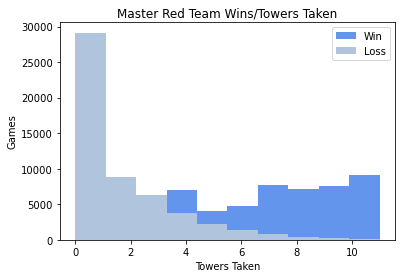

In [35]:
# Histogram on Towers Taken for Wins Against Losses Red - Master
plt.hist(m_redwins_df.redTowerKills, label="Win", color='cornflowerblue')
plt.hist(m_redloss_df.redTowerKills, label="Loss", color='lightsteelblue')
plt.legend(loc="upper right")
print(f"Average Towers taken for red wins: {round(m_redwins_df['redTowerKills'].mean(), 3)} Towers")
print(f"Average Towers taken for red losses: {round(m_redloss_df['redTowerKills'].mean(), 3)} Towers")
plt.xlabel('Towers Taken')
plt.ylabel('Games')
plt.title('Master Red Team Wins/Towers Taken')

plt.savefig('../Images/master_red_histo_towers_total.png')

Average Towers taken for blue wins: 6.731 Towers
Average Towers taken for blue losses: 1.95 Towers


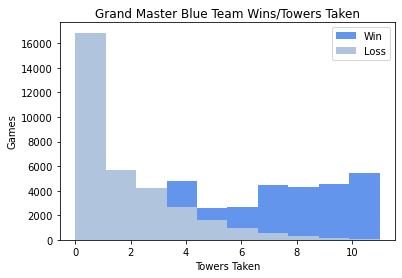

In [36]:
# Histogram on Towers Taken for Wins Against Losses Blue - Grand Master
plt.hist(gm_bluewins_df.blueTowerKills, label="Win", color='cornflowerblue')
plt.hist(gm_blueloss_df.blueTowerKills, label="Loss", color='lightsteelblue')
plt.legend(loc="upper right")
print(f"Average Towers taken for blue wins: {round(gm_bluewins_df['blueTowerKills'].mean(), 3)} Towers")
print(f"Average Towers taken for blue losses: {round(gm_blueloss_df['blueTowerKills'].mean(), 3)} Towers")
plt.xlabel('Towers Taken')
plt.ylabel('Games')
plt.title('Grand Master Blue Team Wins/Towers Taken')

plt.savefig('../Images/grandmaster_blue_histo_towers_total.png')

Average Towers taken for red wins: 6.65 Towers
Average Towers taken for red losses: 1.822 Towers


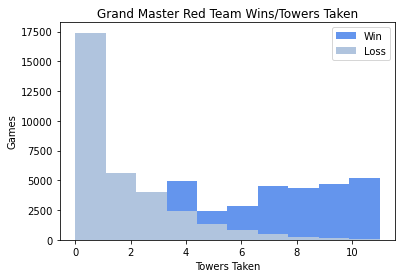

In [37]:
# Histogram on Towers Taken for Wins Against Losses Red - Grand Master
plt.hist(gm_redwins_df.redTowerKills, label="Win", color='cornflowerblue')
plt.hist(gm_redloss_df.redTowerKills, label="Loss", color='lightsteelblue')
plt.legend(loc="upper right")
print(f"Average Towers taken for red wins: {round(gm_redwins_df['redTowerKills'].mean(), 3)} Towers")
print(f"Average Towers taken for red losses: {round(gm_redloss_df['redTowerKills'].mean(), 3)} Towers")
plt.xlabel('Towers Taken')
plt.ylabel('Games')
plt.title('Grand Master Red Team Wins/Towers Taken')

plt.savefig('../Images/grandmaster_red_histo_towers_total.png')

Average Towers taken for blue wins: 6.829 Towers
Average Towers taken for blue losses: 2.04 Towers


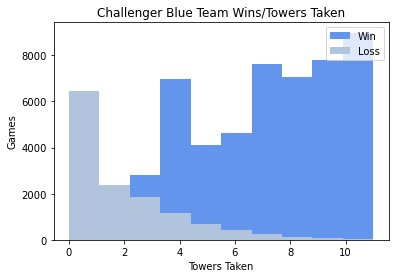

In [38]:
# Histogram on Towers Taken for Wins Against Losses Blue - Challenger
plt.hist(ch_bluewins_df.blueTowerKills, label="Win", color='cornflowerblue')
plt.hist(ch_blueloss_df.blueTowerKills, label="Loss", color='lightsteelblue')
plt.legend(loc="upper right")
print(f"Average Towers taken for blue wins: {round(ch_bluewins_df['blueTowerKills'].mean(), 3)} Towers")
print(f"Average Towers taken for blue losses: {round(ch_blueloss_df['blueTowerKills'].mean(), 3)} Towers")
plt.xlabel('Towers Taken')
plt.ylabel('Games')
plt.title('Challenger Blue Team Wins/Towers Taken')

plt.savefig('../Images/challenger_blue_histo_towers_total.png')

Average Towers taken for red wins: 6.615 Towers
Average Towers taken for red losses: 1.897 Towers


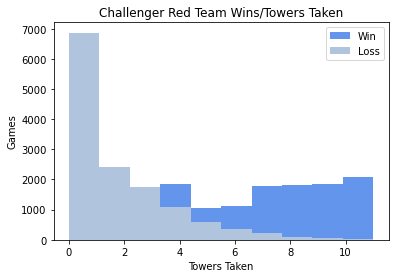

In [39]:
# Histogram on Towers Taken for Wins Against Losses Red - Challenger
plt.hist(ch_redwins_df.redTowerKills, label="Win", color='cornflowerblue')
plt.hist(ch_redloss_df.redTowerKills, label="Loss", color='lightsteelblue')
plt.legend(loc="upper right")
print(f"Average Towers taken for red wins: {round(ch_redwins_df['redTowerKills'].mean(), 3)} Towers")
print(f"Average Towers taken for red losses: {round(ch_redloss_df['redTowerKills'].mean(), 3)} Towers")
plt.xlabel('Towers Taken')
plt.ylabel('Games')
plt.title('Challenger Red Team Wins/Towers Taken')

plt.savefig('../Images/challenger_red_histo_towers_total.png')

## Frequency Distribution of Baron's Killed by Each Team vs. Wins for Each Rank

Baron Nashor is the biggest NPC in League of Legends. It spawns in the jungle, with the enterance to fight the monster closest to Red side. Baron provides considerable stat increases for a few minutes, making Killing this monster very worth while. At least, in theory! Does killing Baron Nashor correlate with a win?

Average Barons taken for blue wins: 0.489 Baron Nashor's
Average Barons taken for blue losses: 0.109 Baron Nashor's


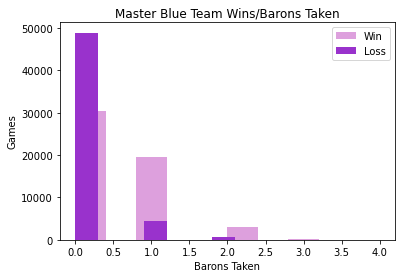

In [40]:
# Histogram on Towers Taken for Wins Against Losses Blue - Master
plt.hist(m_bluewins_df.blueBaronKills, label="Win", color='plum')
plt.hist(m_blueloss_df.blueBaronKills, label="Loss", color='darkorchid')

plt.legend(loc="upper right")

print(f"Average Barons taken for blue wins: {round(m_bluewins_df['blueBaronKills'].mean(), 3)} Baron Nashor's")
print(f"Average Barons taken for blue losses: {round(m_blueloss_df['blueBaronKills'].mean(), 3)} Baron Nashor's")

plt.xlabel('Barons Taken')
plt.ylabel('Games')
plt.title('Master Blue Team Wins/Barons Taken')

plt.savefig('../Images/master_blue_histo_barons_total.png')

Average Barons taken for red wins: 0.542 Baron Nashor's
Average Barons taken for red losses: 0.115 Baron Nashor's


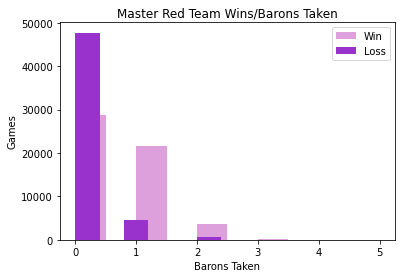

In [41]:
# Histogram on Towers Taken for Wins Against Losses Blue - Master
plt.hist(m_redwins_df.redBaronKills, label="Win", color='plum')
plt.hist(m_redloss_df.redBaronKills, label="Loss", color='darkorchid')

plt.legend(loc="upper right")

print(f"Average Barons taken for red wins: {round(m_redwins_df['redBaronKills'].mean(), 3)} Baron Nashor's")
print(f"Average Barons taken for red losses: {round(m_redloss_df['redBaronKills'].mean(), 3)} Baron Nashor's")

plt.xlabel('Barons Taken')
plt.ylabel('Games')
plt.title('Master Red Team Wins/Barons Taken')

plt.savefig('../Images/master_red_histo_barons_total.png')

Average Barons taken for blue wins: 0.483 Baron Nashor(s)
Average Barons taken for blue losses: 0.111 Baron Nashor(s)


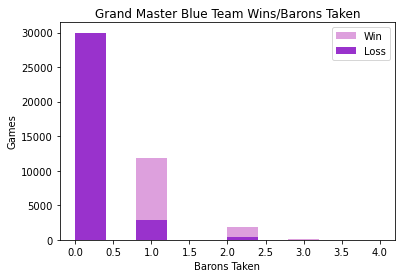

In [42]:
# Histogram on Towers Taken for Wins Against Losses Blue - Grand Master
plt.hist(gm_bluewins_df.blueBaronKills, label="Win", color='plum')
plt.hist(gm_blueloss_df.blueBaronKills, label="Loss", color='darkorchid')

plt.legend(loc="upper right")

print(f"Average Barons taken for blue wins: {round(gm_bluewins_df['blueBaronKills'].mean(), 3)} Baron Nashor(s)")
print(f"Average Barons taken for blue losses: {round(gm_blueloss_df['blueBaronKills'].mean(), 3)} Baron Nashor(s)")

plt.xlabel('Barons Taken')
plt.ylabel('Games')
plt.title('Grand Master Blue Team Wins/Barons Taken')

plt.savefig('../Images/grandmaster_blue_histo_barons_total.png')

Average Barons taken for red wins: 0.533 Baron Nashor(s)
Average Barons taken for red losses: 0.115 Baron Nashor(s)


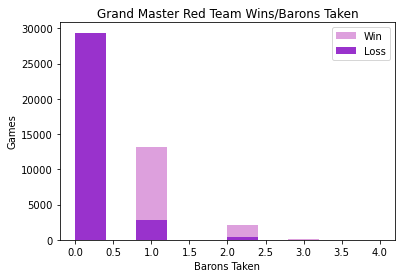

In [43]:
# Histogram on Towers Taken for Wins Against Losses Blue - Grand Master
plt.hist(gm_redwins_df.redBaronKills, label="Win", color='plum')
plt.hist(gm_redloss_df.redBaronKills, label="Loss", color='darkorchid')

plt.legend(loc="upper right")

print(f"Average Barons taken for red wins: {round(gm_redwins_df['redBaronKills'].mean(), 3)} Baron Nashor(s)")
print(f"Average Barons taken for red losses: {round(gm_redloss_df['redBaronKills'].mean(), 3)} Baron Nashor(s)")

plt.xlabel('Barons Taken')
plt.ylabel('Games')
plt.title('Grand Master Red Team Wins/Barons Taken')

plt.savefig('../Images/grandmaster_red_histo_barons_total.png')

Average Barons taken for blue wins: 0.489 Baron Nashor(s)
Average Barons taken for blue losses: 0.116 Baron Nashor(s)


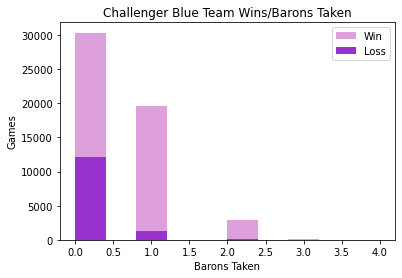

In [44]:
# Histogram on Towers Taken for Wins Against Losses Blue - Grand Master
plt.hist(ch_bluewins_df.blueBaronKills, label="Win", color='plum')
plt.hist(ch_blueloss_df.blueBaronKills, label="Loss", color='darkorchid')

plt.legend(loc="upper right")

print(f"Average Barons taken for blue wins: {round(ch_bluewins_df['blueBaronKills'].mean(), 3)} Baron Nashor(s)")
print(f"Average Barons taken for blue losses: {round(ch_blueloss_df['blueBaronKills'].mean(), 3)} Baron Nashor(s)")

plt.xlabel('Barons Taken')
plt.ylabel('Games')
plt.title('Challenger Blue Team Wins/Barons Taken')

plt.savefig('../Images/challenger_blue_histo_barons_total.png')

Average Barons taken for red wins: 0.55 Baron Nashor(s)
Average Barons taken for red losses: 0.123 Baron Nashor(s)


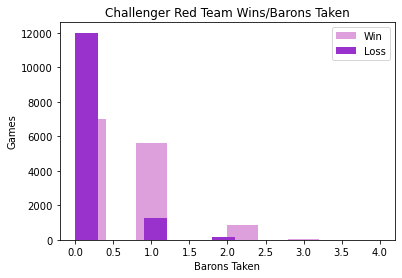

In [45]:
# Histogram on Towers Taken for Wins Against Losses Blue - Grand Master
plt.hist(ch_redwins_df.redBaronKills, label="Win", color='plum')
plt.hist(ch_redloss_df.redBaronKills, label="Loss", color='darkorchid')

plt.legend(loc="upper right")

print(f"Average Barons taken for red wins: {round(ch_redwins_df['redBaronKills'].mean(), 3)} Baron Nashor(s)")
print(f"Average Barons taken for red losses: {round(ch_redloss_df['redBaronKills'].mean(), 3)} Baron Nashor(s)")

plt.xlabel('Barons Taken')
plt.ylabel('Games')
plt.title('Challenger Red Team Wins/Barons Taken')

plt.savefig('../Images/challenger_red_histo_barons_total.png')

---
### Plot Baron's Talen True/False

Average First Barons taken for blue wins: 0.395 Baron Nashor(s)
Average First Barons taken for blue losses: 0.081 Baron Nashor(s)


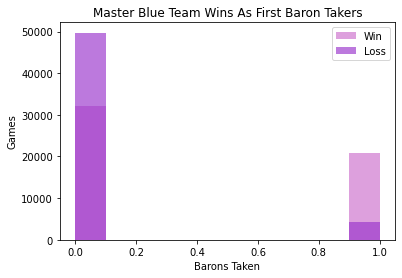

In [46]:
# Histogram on Towers Taken for Wins Against Losses Blue - Challenger
plt.hist(m_bluewins_df.blueFirstBaron, label="Win", color='plum')
plt.hist(m_blueloss_df.blueFirstBaron, label="Loss", color='darkorchid', alpha=0.65)

plt.legend(loc="upper right")

print(f"Average First Barons taken for blue wins: {round(m_bluewins_df['blueFirstBaron'].mean(), 3)} Baron Nashor(s)")
print(f"Average First Barons taken for blue losses: {round(m_blueloss_df['blueFirstBaron'].mean(), 3)} Baron Nashor(s)")

plt.xlabel('Barons Taken')
plt.ylabel('Games')
plt.title('Master Blue Team Wins As First Baron Takers')

plt.savefig('../Images/master_blue_histo_barons_total_2.png')

Average First Barons taken for red wins: 0.433 Baron Nashor(s)
Average First Barons taken for red losses: 0.085 Baron Nashor(s)


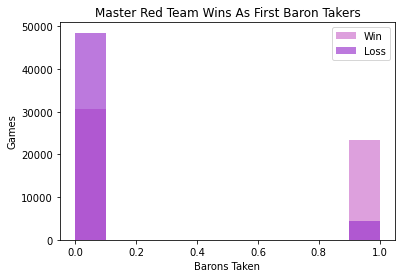

In [47]:
# Histogram on Towers Taken for Wins Against Losses Blue - Challenger
plt.hist(m_redwins_df.redFirstBaron, label="Win", color='plum')
plt.hist(m_redloss_df.redFirstBaron, label="Loss", color='darkorchid', alpha=0.65)

plt.legend(loc="upper right")

print(f"Average First Barons taken for red wins: {round(m_redwins_df['redFirstBaron'].mean(), 3)} Baron Nashor(s)")
print(f"Average First Barons taken for red losses: {round(m_redloss_df['redFirstBaron'].mean(), 3)} Baron Nashor(s)")

plt.xlabel('Barons Taken')
plt.ylabel('Games')
plt.title('Master Red Team Wins As First Baron Takers')

plt.savefig('../Images/master_red_histo_barons_total_2.png')

Average First Barons taken for blue wins: 0.389 Baron Nashor(s)
Average First Barons taken for blue losses: 0.083 Baron Nashor(s)


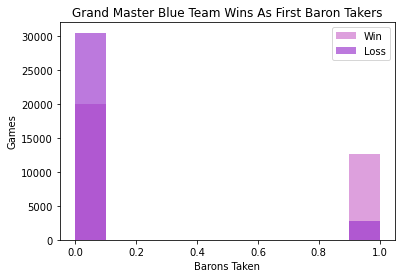

In [48]:
# Histogram on Towers Taken for Wins Against Losses Blue - Challenger
plt.hist(gm_bluewins_df.blueFirstBaron, label="Win", color='plum')
plt.hist(gm_blueloss_df.blueFirstBaron, label="Loss", color='darkorchid', alpha=0.65)

plt.legend(loc="upper right")

print(f"Average First Barons taken for blue wins: {round(gm_bluewins_df['blueFirstBaron'].mean(), 3)} Baron Nashor(s)")
print(f"Average First Barons taken for blue losses: {round(gm_blueloss_df['blueFirstBaron'].mean(), 3)} Baron Nashor(s)")

plt.xlabel('Barons Taken')
plt.ylabel('Games')
plt.title('Grand Master Blue Team Wins As First Baron Takers')

plt.savefig('../Images/grandmaster_blue_histo_barons_total_2.png')

Average First Barons taken for red wins: 0.425 Baron Nashor(s)
Average First Barons taken for red losses: 0.086 Baron Nashor(s)


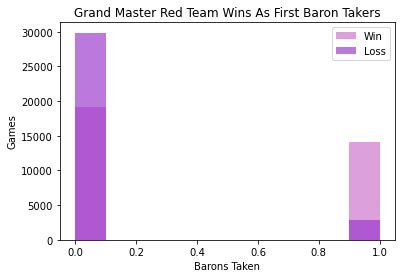

In [49]:
# Histogram on Towers Taken for Wins Against Losses Blue - Challenger
plt.hist(gm_redwins_df.redFirstBaron, label="Win", color='plum')
plt.hist(gm_redloss_df.redFirstBaron, label="Loss", color='darkorchid', alpha=0.65)

plt.legend(loc="upper right")

print(f"Average First Barons taken for red wins: {round(gm_redwins_df['redFirstBaron'].mean(), 3)} Baron Nashor(s)")
print(f"Average First Barons taken for red losses: {round(gm_redloss_df['redFirstBaron'].mean(), 3)} Baron Nashor(s)")

plt.xlabel('Barons Taken')
plt.ylabel('Games')
plt.title('Grand Master Red Team Wins As First Baron Takers')

plt.savefig('../Images/grandmaster_red_histo_barons_total_2.png')

Average First Barons taken for blue wins: 0.395 Baron Nashor(s)
Average First Barons taken for blue losses: 0.087 Baron Nashor(s)


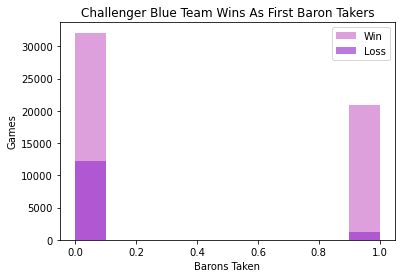

In [50]:
# Histogram on Towers Taken for Wins Against Losses Blue - Challenger
plt.hist(ch_bluewins_df.blueFirstBaron, label="Win", color='plum')
plt.hist(ch_blueloss_df.blueFirstBaron, label="Loss", color='darkorchid', alpha=0.65)

plt.legend(loc="upper right")

print(f"Average First Barons taken for blue wins: {round(ch_bluewins_df['blueFirstBaron'].mean(), 3)} Baron Nashor(s)")
print(f"Average First Barons taken for blue losses: {round(ch_blueloss_df['blueFirstBaron'].mean(), 3)} Baron Nashor(s)")

plt.xlabel('Barons Taken')
plt.ylabel('Games')
plt.title('Challenger Blue Team Wins As First Baron Takers')

plt.savefig('../Images/challenger_blue_histo_barons_total_2.png')

Average First Barons taken for red wins: 0.441 Baron Nashor(s)
Average First Barons taken for red losses: 0.092 Baron Nashor(s)


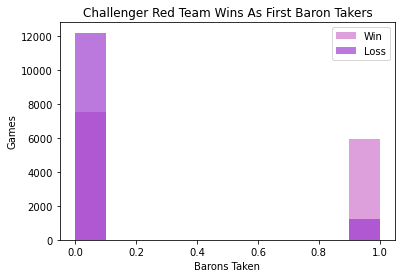

In [51]:
# Histogram on Towers Taken for Wins Against Losses Blue - Challenger
plt.hist(ch_redwins_df.redFirstBaron, label="Win", color='plum')
plt.hist(ch_redloss_df.redFirstBaron, label="Loss", color='darkorchid', alpha=0.65)

plt.legend(loc="upper right")

print(f"Average First Barons taken for red wins: {round(ch_redwins_df['redFirstBaron'].mean(), 3)} Baron Nashor(s)")
print(f"Average First Barons taken for red losses: {round(ch_redloss_df['redFirstBaron'].mean(), 3)} Baron Nashor(s)")

plt.xlabel('Barons Taken')
plt.ylabel('Games')
plt.title('Challenger Red Team Wins As First Baron Takers')

plt.savefig('../Images/challenger_red_histo_barons_total_2.png')

## Frequency Distribution of Inhibitors Taken vs. Game Wins 

- Show the frequency of taken inhibitors in won vs. lost games
- Is there a trend? 
- How does it compare to other objectives, like the Towers? Baron? 

Average Inhibitors taken for blue wins: 1.192
Average Inhibitors taken for blue losses: 0.128


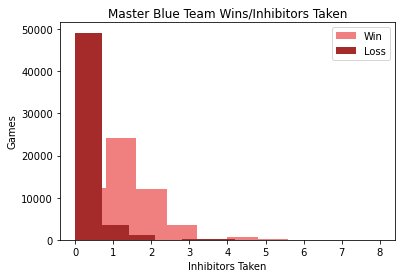

In [52]:
# Histogram on Towers Taken for Wins Against Losses Blue - Master
plt.hist(m_bluewins_df.blueInhibitorKills, label="Win", color='lightcoral')
plt.hist(m_blueloss_df.blueInhibitorKills, label="Loss", color='brown')

plt.legend(loc="upper right")

print(f"Average Inhibitors taken for blue wins: {round(m_bluewins_df['blueInhibitorKills'].mean(), 3)}")
print(f"Average Inhibitors taken for blue losses: {round(m_blueloss_df['blueInhibitorKills'].mean(), 3)}")

plt.xlabel('Inhibitors Taken')
plt.ylabel('Games')
plt.title('Master Blue Team Wins/Inhibitors Taken')

plt.savefig('../Images/master_blue_histo_Inhib_total.png')

Average Inhibitors taken for blue wins: 1.167
Average Inhibitors taken for blue losses: 0.114


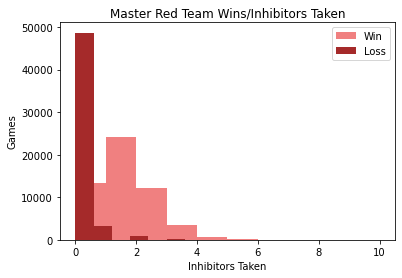

In [53]:
# Histogram on Towers Taken for Wins Against Losses Blue - Master
plt.hist(m_redwins_df.redInhibitorKills, label="Win", color='lightcoral')
plt.hist(m_redloss_df.redInhibitorKills, label="Loss", color='brown')

plt.legend(loc="upper right")

print(f"Average Inhibitors taken for blue wins: {round(m_redwins_df['redInhibitorKills'].mean(), 3)}")
print(f"Average Inhibitors taken for blue losses: {round(m_redloss_df['redInhibitorKills'].mean(), 3)}")

plt.xlabel('Inhibitors Taken')
plt.ylabel('Games')
plt.title('Master Red Team Wins/Inhibitors Taken')

plt.savefig('../Images/master_red_histo_Inhib_total.png')

Average Inhibitors taken for blue wins: 1.166
Average Inhibitors taken for blue losses: 0.134


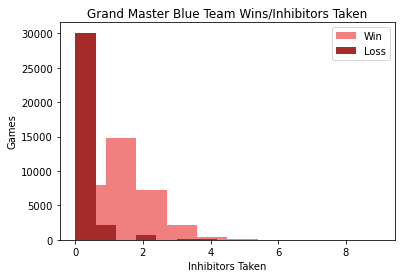

In [54]:
# Histogram on Towers Taken for Wins Against Losses Blue - Master
plt.hist(gm_bluewins_df.blueInhibitorKills, label="Win", color='lightcoral')
plt.hist(gm_blueloss_df.blueInhibitorKills, label="Loss", color='brown')

plt.legend(loc="upper right")

print(f"Average Inhibitors taken for blue wins: {round(gm_bluewins_df['blueInhibitorKills'].mean(), 3)}")
print(f"Average Inhibitors taken for blue losses: {round(gm_blueloss_df['blueInhibitorKills'].mean(), 3)}")

plt.xlabel('Inhibitors Taken')
plt.ylabel('Games')
plt.title('Grand Master Blue Team Wins/Inhibitors Taken')

plt.savefig('../Images/grandmaster_blue_histo_Inhib_total.png')

Average Inhibitors taken for blue wins: 1.135
Average Inhibitors taken for blue losses: 0.121


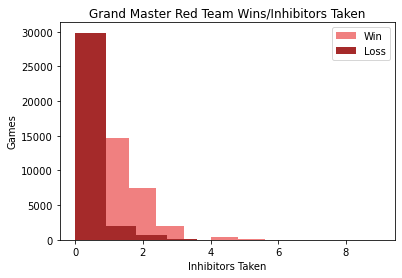

In [55]:
# Histogram on Towers Taken for Wins Against Losses Blue - Master
plt.hist(gm_redwins_df.redInhibitorKills, label="Win", color='lightcoral')
plt.hist(gm_redloss_df.redInhibitorKills, label="Loss", color='brown')

plt.legend(loc="upper right")

print(f"Average Inhibitors taken for blue wins: {round(gm_redwins_df['redInhibitorKills'].mean(), 3)}")
print(f"Average Inhibitors taken for blue losses: {round(gm_redloss_df['redInhibitorKills'].mean(), 3)}")

plt.xlabel('Inhibitors Taken')
plt.ylabel('Games')
plt.title('Grand Master Red Team Wins/Inhibitors Taken')

plt.savefig('../Images/grandmaster_red_histo_Inhib_total.png')

Average Inhibitors taken for blue wins: 1.192
Average Inhibitors taken for blue losses: 0.12


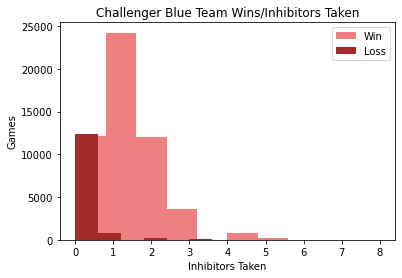

In [56]:
# Histogram on Towers Taken for Wins Against Losses Blue - Master
plt.hist(ch_bluewins_df.blueInhibitorKills, label="Win", color='lightcoral')
plt.hist(ch_blueloss_df.blueInhibitorKills, label="Loss", color='brown')

plt.legend(loc="upper right")

print(f"Average Inhibitors taken for blue wins: {round(ch_bluewins_df['blueInhibitorKills'].mean(), 3)}")
print(f"Average Inhibitors taken for blue losses: {round(ch_blueloss_df['blueInhibitorKills'].mean(), 3)}")

plt.xlabel('Inhibitors Taken')
plt.ylabel('Games')
plt.title('Challenger Blue Team Wins/Inhibitors Taken')

plt.savefig('../Images/challenger_blue_histo_Inhib_total.png')

Average Inhibitors taken for blue wins: 1.062
Average Inhibitors taken for blue losses: 0.108


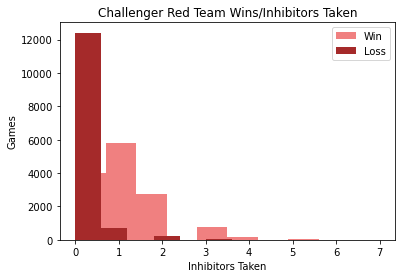

In [57]:
# Histogram on Towers Taken for Wins Against Losses Blue - Master
plt.hist(ch_redwins_df.redInhibitorKills, label="Win", color='lightcoral')
plt.hist(ch_redloss_df.redInhibitorKills, label="Loss", color='brown')

plt.legend(loc="upper right")

print(f"Average Inhibitors taken for blue wins: {round(ch_redwins_df['redInhibitorKills'].mean(), 3)}")
print(f"Average Inhibitors taken for blue losses: {round(ch_redloss_df['redInhibitorKills'].mean(), 3)}")

plt.xlabel('Inhibitors Taken')
plt.ylabel('Games')
plt.title('Challenger Red Team Wins/Inhibitors Taken')

plt.savefig('../Images/challenger_red_histo_Inhib_total.png')

## Frequency Distribution of Kills per Team in Each Rank

- Show the frequency of taken inhibitors in won vs. lost games
- Do kills = winning more frequently? 
- How to kills stack against objectives? 

Average kills for blue wins: 30.408
Average kills for blue losses: 19.199


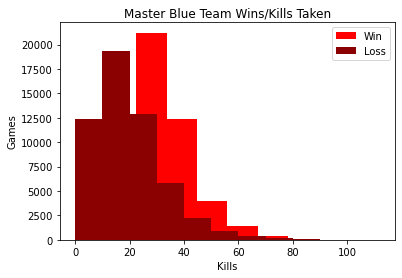

In [58]:
# Histogram on Towers Taken for Wins Against Losses Blue - Master
plt.hist(m_bluewins_df.blueKills, label="Win", color='red')
plt.hist(m_blueloss_df.blueKills, label="Loss", color='darkred')

plt.legend(loc="upper right")

print(f"Average kills for blue wins: {round(m_bluewins_df['blueKills'].mean(), 3)}")
print(f"Average kills for blue losses: {round(m_blueloss_df['blueKills'].mean(), 3)}")

plt.xlabel('Kills')
plt.ylabel('Games')
plt.title('Master Blue Team Wins/Kills Taken')

plt.savefig('../Images/master_blue_kill_Inhib_total.png')

Average kills for red wins: 30.29
Average kills for red losses: 18.916


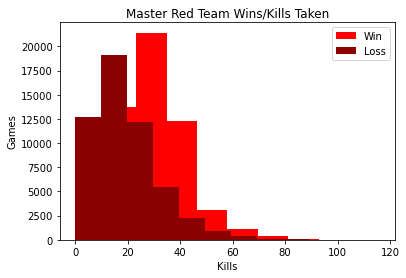

In [59]:
# Histogram on Towers Taken for Wins Against Losses Blue - Master
plt.hist(m_redwins_df.redKills, label="Win", color='red')
plt.hist(m_redloss_df.redKills, label="Loss", color='darkred')

plt.legend(loc="upper right")

print(f"Average kills for red wins: {round(m_redwins_df['redKills'].mean(), 3)}")
print(f"Average kills for red losses: {round(m_redloss_df['redKills'].mean(), 3)}")

plt.xlabel('Kills')
plt.ylabel('Games')
plt.title('Master Red Team Wins/Kills Taken')

plt.savefig('../Images/master_red_histo_kill_total.png')

Average kills for blue wins: 30.646
Average kills for blue losses: 19.248


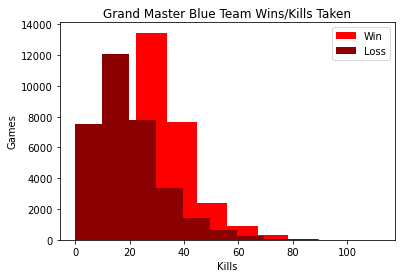

In [60]:
# Histogram on Towers Taken for Wins Against Losses Blue - Master
plt.hist(gm_bluewins_df.blueKills, label="Win", color='red')
plt.hist(gm_blueloss_df.blueKills, label="Loss", color='darkred')

plt.legend(loc="upper right")

print(f"Average kills for blue wins: {round(gm_bluewins_df['blueKills'].mean(), 3)}")
print(f"Average kills for blue losses: {round(gm_blueloss_df['blueKills'].mean(), 3)}")

plt.xlabel('Kills')
plt.ylabel('Games')
plt.title('Grand Master Blue Team Wins/Kills Taken')

plt.savefig('../Images/grandmaster_blue_histo_kill_total.png')

Average kills for red wins: 30.471
Average kills for red losses: 19.0


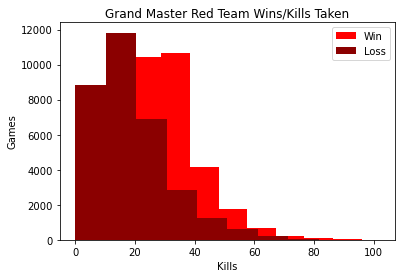

In [61]:
# Histogram on Towers Taken for Wins Against Losses Blue - Master
plt.hist(gm_redwins_df.redKills, label="Win", color='red')
plt.hist(gm_redloss_df.redKills, label="Loss", color='darkred')

plt.legend(loc="upper right")

print(f"Average kills for red wins: {round(gm_redwins_df['redKills'].mean(), 3)}")
print(f"Average kills for red losses: {round(gm_redloss_df['redKills'].mean(), 3)}")

plt.xlabel('Kills')
plt.ylabel('Games')
plt.title('Grand Master Red Team Wins/Kills Taken')

plt.savefig('../Images/grandmaster_red_histo_kill_total.png')

Average kills for blue wins: 30.408
Average kills for blue losses: 18.314


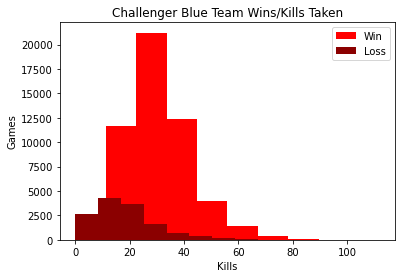

In [62]:
# Histogram on Towers Taken for Wins Against Losses Blue - Master
plt.hist(ch_bluewins_df.blueKills, label="Win", color='red')
plt.hist(ch_blueloss_df.blueKills, label="Loss", color='darkred')

plt.legend(loc="upper right")

print(f"Average kills for blue wins: {round(ch_bluewins_df['blueKills'].mean(), 3)}")
print(f"Average kills for blue losses: {round(ch_blueloss_df['blueKills'].mean(), 3)}")

plt.xlabel('Kills')
plt.ylabel('Games')
plt.title('Challenger Blue Team Wins/Kills Taken')

plt.savefig('../Images/challenger_blue_histo_kill_total.png')

Average kills for red wins: 29.856
Average kills for red losses: 18.348


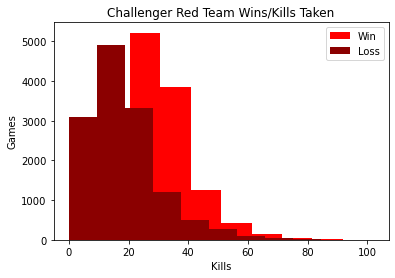

In [63]:
# Histogram on Towers Taken for Wins Against Losses Blue - Master
plt.hist(ch_redwins_df.redKills, label="Win", color='red')
plt.hist(ch_redloss_df.redKills, label="Loss", color='darkred')

plt.legend(loc="upper right")

print(f"Average kills for red wins: {round(ch_redwins_df['redKills'].mean(), 3)}")
print(f"Average kills for red losses: {round(ch_redloss_df['redKills'].mean(), 3)}")

plt.xlabel('Kills')
plt.ylabel('Games')
plt.title('Challenger Red Team Wins/Kills Taken')

plt.savefig('../Images/challenger_red_histo_kill_total.png')

## Frequency Distribution of Total Level (XP) vs. Wins/Losses

- As players take objectives and kill one another, they gain XP. Does Total Level have any correlation with winning?

Average total player levels for blue wins: 67.402
Average total player levels for blue losses: 61.635
---------------------------------
Note: The maximum level a player can be is lvl 18. There are 5 players per team.
Meaning the maximum level sum possible per team would be 90.


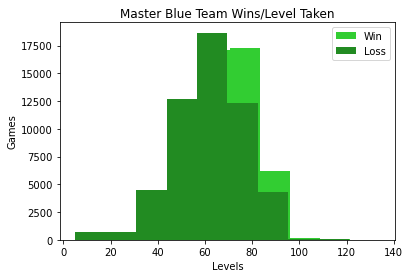

In [64]:
# Histogram on Towers Taken for Wins Against Losses Blue - Master
plt.hist(m_bluewins_df.blueTotalLevel, label="Win", color='limegreen')
plt.hist(m_blueloss_df.blueTotalLevel, label="Loss", color='forestgreen')

plt.legend(loc="upper right")

print(f"Average total player levels for blue wins: {round(m_bluewins_df['blueTotalLevel'].mean(), 3)}")
print(f"Average total player levels for blue losses: {round(m_blueloss_df['blueTotalLevel'].mean(), 3)}")
print("---------------------------------")
print("Note: The maximum level a player can be is lvl 18. There are 5 players per team.")
print("Meaning the maximum level sum possible per team would be 90.")

plt.xlabel('Levels')
plt.ylabel('Games')
plt.title('Master Blue Team Wins/Level Taken')

plt.savefig('../Images/master_blue_level_total.png')

Average total player levels for blue wins: 68.026
Average total player levels for blue losses: 61.3
---------------------------------
Note: The maximum level a player can be is lvl 18. There are 5 players per team.
Meaning the maximum level sum possible per team would be 90.


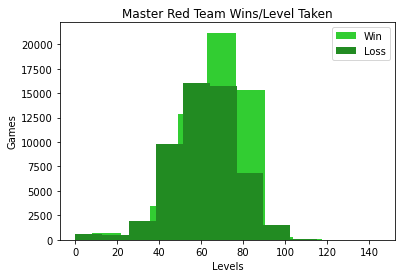

In [65]:
# Histogram on Towers Taken for Wins Against Losses Blue - Master
plt.hist(m_redwins_df.redTotalLevel, label="Win", color='limegreen')
plt.hist(m_redloss_df.redTotalLevel, label="Loss", color='forestgreen')

plt.legend(loc="upper right")

print(f"Average total player levels for blue wins: {round(m_redwins_df['redTotalLevel'].mean(), 3)}")
print(f"Average total player levels for blue losses: {round(m_redloss_df['redTotalLevel'].mean(), 3)}")
print("---------------------------------")
print("Note: The maximum level a player can be is lvl 18. There are 5 players per team.")
print("Meaning the maximum level sum possible per team would be 90.")

plt.xlabel('Levels')
plt.ylabel('Games')
plt.title('Master Red Team Wins/Level Taken')

plt.savefig('../Images/master_red_level_total.png')

Average total player levels for blue wins: 67.888
Average total player levels for blue losses: 62.069
---------------------------------
Note: The maximum level a player can be is lvl 18. There are 5 players per team.
Meaning the maximum level sum possible per team would be 90.


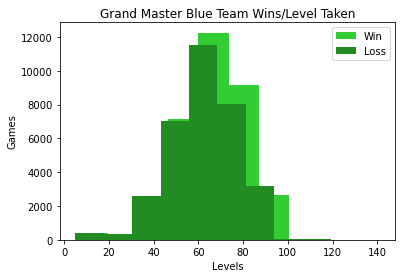

In [66]:
# Histogram on Towers Taken for Wins Against Losses Blue - Master
plt.hist(gm_bluewins_df.blueTotalLevel, label="Win", color='limegreen')
plt.hist(gm_blueloss_df.blueTotalLevel, label="Loss", color='forestgreen')

plt.legend(loc="upper right")

print(f"Average total player levels for blue wins: {round(gm_bluewins_df['blueTotalLevel'].mean(), 3)}")
print(f"Average total player levels for blue losses: {round(gm_blueloss_df['blueTotalLevel'].mean(), 3)}")
print("---------------------------------")
print("Note: The maximum level a player can be is lvl 18. There are 5 players per team.")
print("Meaning the maximum level sum possible per team would be 90.")

plt.xlabel('Levels')
plt.ylabel('Games')
plt.title('Grand Master Blue Team Wins/Level Taken')

plt.savefig('../Images/grandmaster_blue_level_total.png')

Average total player levels for blue wins: 68.395
Average total player levels for blue losses: 61.847
---------------------------------
Note: The maximum level a player can be is lvl 18. There are 5 players per team.
Meaning the maximum level sum possible per team would be 90.


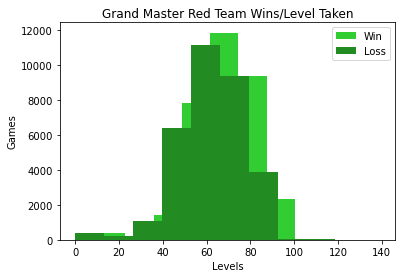

In [67]:
# Histogram on Towers Taken for Wins Against Losses Blue - Master
plt.hist(gm_redwins_df.redTotalLevel, label="Win", color='limegreen')
plt.hist(gm_redloss_df.redTotalLevel, label="Loss", color='forestgreen')

plt.legend(loc="upper right")

print(f"Average total player levels for blue wins: {round(gm_redwins_df['redTotalLevel'].mean(), 3)}")
print(f"Average total player levels for blue losses: {round(gm_redloss_df['redTotalLevel'].mean(), 3)}")
print("---------------------------------")
print("Note: The maximum level a player can be is lvl 18. There are 5 players per team.")
print("Meaning the maximum level sum possible per team would be 90.")

plt.xlabel('Levels')
plt.ylabel('Games')
plt.title('Grand Master Red Team Wins/Level Taken')

plt.savefig('../Images/grandmaster_red_level_total.png')

Average total player levels for blue wins: 67.402
Average total player levels for blue losses: 61.844
---------------------------------
Note: The maximum level a player can be is lvl 18. There are 5 players per team.
Meaning the maximum level sum possible per team would be 90.


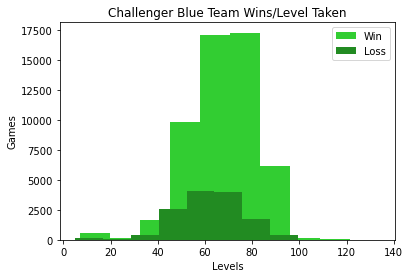

In [68]:
# Histogram on Towers Taken for Wins Against Losses Blue - Master
plt.hist(ch_bluewins_df.blueTotalLevel, label="Win", color='limegreen')
plt.hist(ch_blueloss_df.blueTotalLevel, label="Loss", color='forestgreen')

plt.legend(loc="upper right")

print(f"Average total player levels for blue wins: {round(ch_bluewins_df['blueTotalLevel'].mean(), 3)}")
print(f"Average total player levels for blue losses: {round(ch_blueloss_df['blueTotalLevel'].mean(), 3)}")
print("---------------------------------")
print("Note: The maximum level a player can be is lvl 18. There are 5 players per team.")
print("Meaning the maximum level sum possible per team would be 90.")

plt.xlabel('Levels')
plt.ylabel('Games')
plt.title('Challenger Blue Team Wins/Level Taken')

plt.savefig('../Images/challenger_blue_level_total.png')

Average total player levels for blue wins: 68.251
Average total player levels for blue losses: 62.176
---------------------------------
Note: The maximum level a player can be is lvl 18. There are 5 players per team.
Meaning the maximum level sum possible per team would be 90.


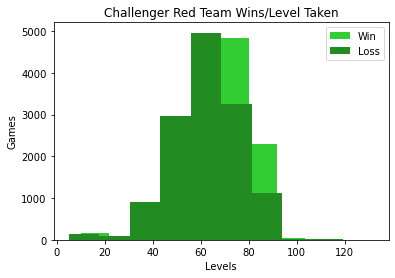

In [69]:
# Histogram on Towers Taken for Wins Against Losses Blue - Master
plt.hist(ch_redwins_df.redTotalLevel, label="Win", color='limegreen')
plt.hist(ch_redloss_df.redTotalLevel, label="Loss", color='forestgreen')

plt.legend(loc="upper right")

print(f"Average total player levels for blue wins: {round(ch_redwins_df['redTotalLevel'].mean(), 3)}")
print(f"Average total player levels for blue losses: {round(ch_redloss_df['redTotalLevel'].mean(), 3)}")
print("---------------------------------")
print("Note: The maximum level a player can be is lvl 18. There are 5 players per team.")
print("Meaning the maximum level sum possible per team would be 90.")

plt.xlabel('Levels')
plt.ylabel('Games')
plt.title('Challenger Red Team Wins/Level Taken')

plt.savefig('../Images/challenger_red_level_total.png')

## Average Game Length

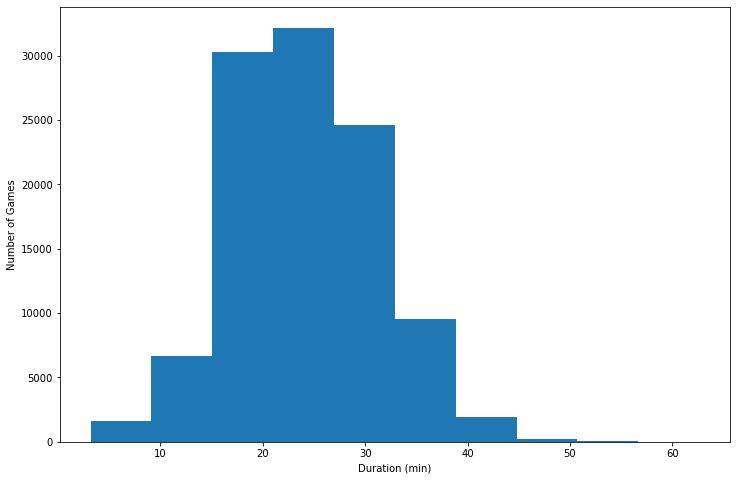

In [70]:
# Plot Histogram of Game Length
plt.figure(figsize=(12,8))
plt.hist(m_df['gameDuraton']/60)
plt.xlabel('Duration (min)')
plt.ylabel('Number of Games')
plt.savefig('../Images/avg_game_length_histo.png')

## Correlation Matrix Chart(s)

### Master 

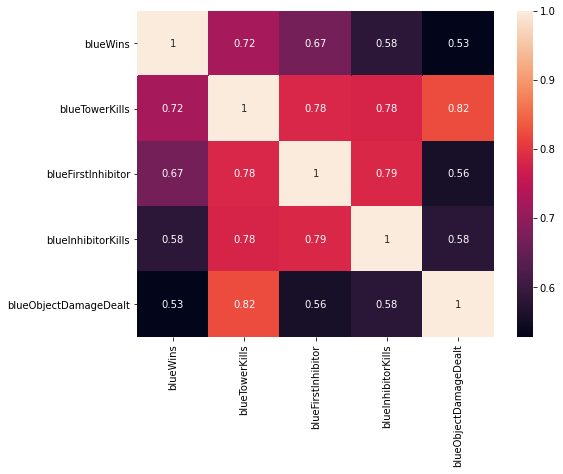

In [85]:
# Correlation Matrix For Master Elo Blue Team
plt.figure(figsize=(8,6))
m_blue_corr = m_blue_df.corr()['blueWins'][:].sort_values(axis=0, ascending=False)

# Gather columns/data that has a correlation value that is statistically significant
m_blue_corr_cols = [x for x,corr in m_blue_corr.iteritems() if abs(corr)>0.5]

#sns.set(font_scale = 1)
sns.heatmap(m_blue_df[m_blue_corr_cols].corr(), annot=True)
plt.savefig('../Images/master_corr_matrix_blue.png', bbox_inches='tight')

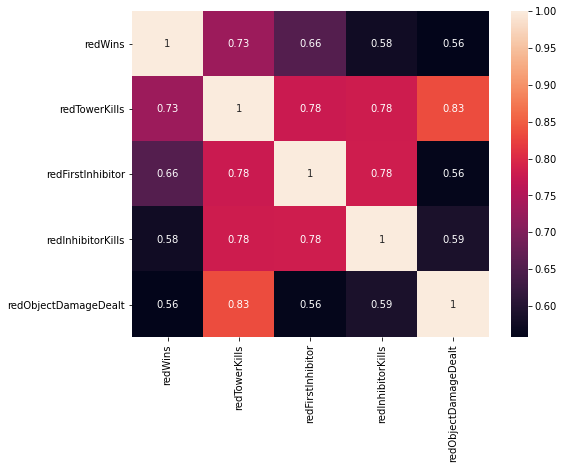

In [72]:
# Correlation Matrix For Master Elo Red Team
plt.figure(figsize=(8,6))
m_red_corr = m_red_df.corr()['redWins'][:].sort_values(axis=0, ascending=False)

# Gather columns/data that has a correlation value that is statistically significant
m_red_corr_cols = [x for x,corr in m_red_corr.iteritems() if abs(corr)>0.5]

#sns.set(font_scale = 1)
sns.heatmap(m_red_df[m_red_corr_cols].corr(), annot=True)
plt.savefig('../Images/master_corr_matrix_red.png', bbox_inches='tight')

### Grand Master 

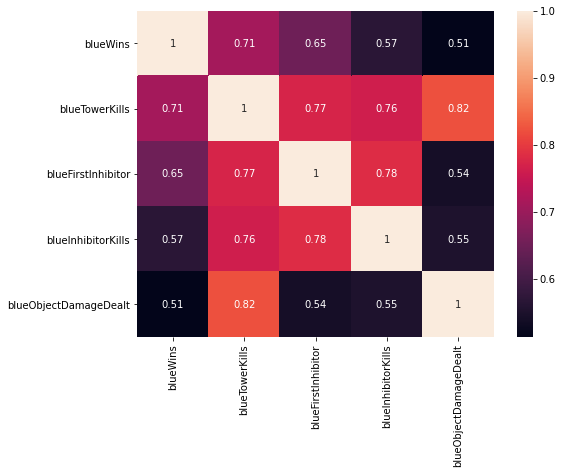

In [73]:
# Correlation Matrix For Master Elo Blue Team
plt.figure(figsize=(8,6))
gm_blue_corr = gm_blue_df.corr()['blueWins'][:].sort_values(axis=0, ascending=False)

# Gather columns/data that has a correlation value that is statistically significant
gm_blue_corr_cols = [x for x,corr in gm_blue_corr.iteritems() if abs(corr)>0.5]

#sns.set(font_scale = 1)
sns.heatmap(gm_blue_df[gm_blue_corr_cols].corr(), annot=True)
plt.savefig('../Images/grandmaster_corr_matrix_blue.png', bbox_inches='tight')

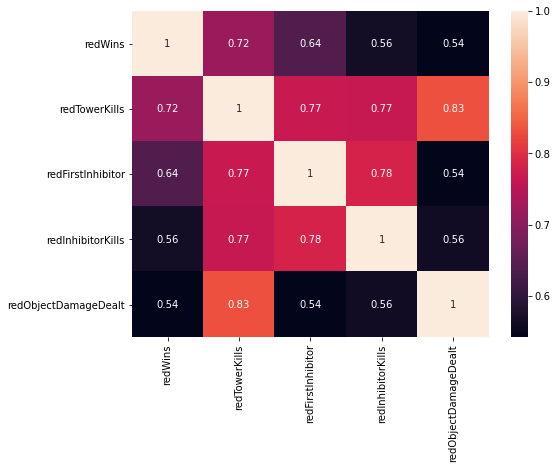

In [74]:
# Correlation Matrix For Master Elo Red Team
plt.figure(figsize=(8,6))
gm_red_corr = gm_red_df.corr()['redWins'][:].sort_values(axis=0, ascending=False)

# Gather columns/data that has a correlation value that is statistically significant
gm_red_corr_cols = [x for x,corr in gm_red_corr.iteritems() if abs(corr)>0.5]

#sns.set(font_scale = 1)
sns.heatmap(gm_red_df[gm_red_corr_cols].corr(), annot=True)
plt.savefig('../Images/grandmaster_corr_matrix_red.png', bbox_inches='tight')

### Challenger

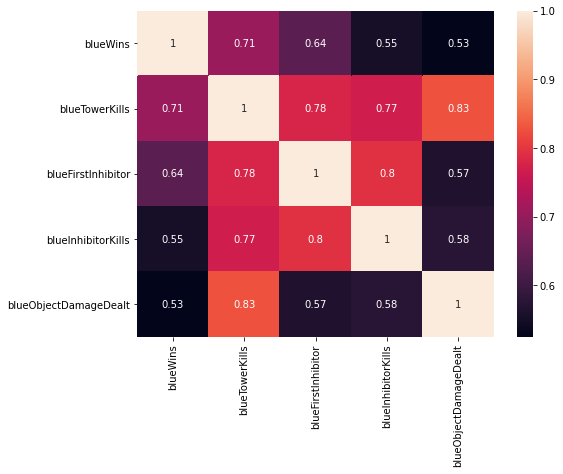

In [75]:
# Correlation Matrix For Master Elo Blue Team
plt.figure(figsize=(8,6))
ch_blue_corr = ch_blue_df.corr()['blueWins'][:].sort_values(axis=0, ascending=False)

# Gather columns/data that has a correlation value that is statistically significant
ch_blue_corr_cols = [x for x,corr in ch_blue_corr.iteritems() if abs(corr)>0.5]

#sns.set(font_scale = 1)
sns.heatmap(ch_blue_df[ch_blue_corr_cols].corr(), annot=True)
plt.savefig('../Images/challenger_corr_matrix_blue.png', bbox_inches='tight')

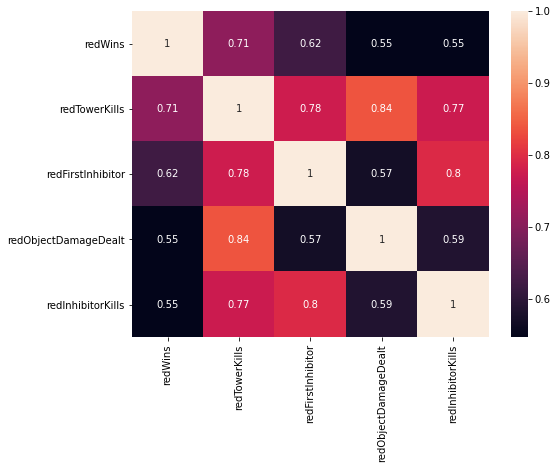

In [76]:
# Correlation Matrix For Master Elo Red Team
plt.figure(figsize=(8,6))
ch_red_corr = ch_red_df.corr()['redWins'][:].sort_values(axis=0, ascending=False)

# Gather columns/data that has a correlation value that is statistically significant
ch_red_corr_cols = [x for x,corr in ch_red_corr.iteritems() if abs(corr)>0.5]

#sns.set(font_scale = 1)
sns.heatmap(ch_red_df[ch_red_corr_cols].corr(), annot=True)

plt.savefig('../Images/challenger_corr_matrix_red.png', bbox_inches='tight')

## Frequency Distribution of Gold Total vs. Won Games for Each Rank

After looking at the objectives above, it's safe to say some gold will be earned for killing towers, dragons, and Baron. So, can total gold be correlated with a game's win?

Average Gold Total for blue wins: 51832.148
Average Gold Total for blue losses: 43770.515


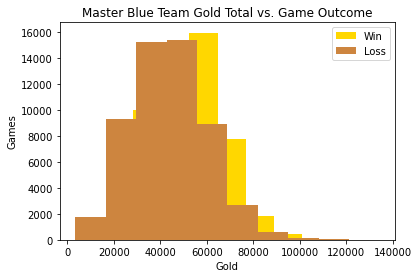

In [77]:
# Histogram on Blue Total Gold for Wins Against Losses- Master

plt.hist(m_bluewins_df.blueTotalGold, label="Win", color='gold')
plt.hist(m_blueloss_df.blueTotalGold, label="Loss", color='peru')

plt.legend(loc="upper right")
print(f"Average Gold Total for blue wins: {round(m_bluewins_df['blueTotalGold'].mean(), 3)}")
print(f"Average Gold Total for blue losses: {round(m_blueloss_df['blueTotalGold'].mean(), 3)}")
plt.xlabel('Gold')
plt.ylabel('Games')
plt.title('Master Blue Team Gold Total vs. Game Outcome')
plt.savefig('../Images/master_blue_gold_outcome.png')
plt.show()

Average Gold Total for red wins: 52372.644
Average Gold Total for red losses: 43290.894


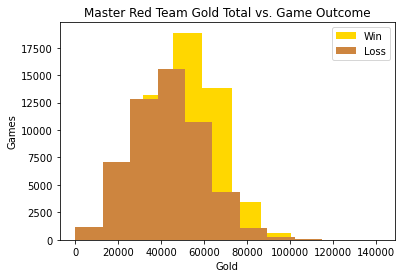

In [78]:
# Histogram on Red Total Gold for Wins Against Losses- Master

plt.hist(m_redwins_df.redTotalGold, label="Win", color='gold')
plt.hist(m_redloss_df.redTotalGold, label="Loss", color='peru')

plt.legend(loc="upper right")
print(f"Average Gold Total for red wins: {round(m_redwins_df['redTotalGold'].mean(), 3)}")
print(f"Average Gold Total for red losses: {round(m_redloss_df['redTotalGold'].mean(), 3)}")
plt.xlabel('Gold')
plt.ylabel('Games')
plt.title('Master Red Team Gold Total vs. Game Outcome')
plt.savefig('../Images/master_red_gold_outcome.png')
plt.show()

Average Gold Total for blue wins: 52181.812
Average Gold Total for blue losses: 44086.05


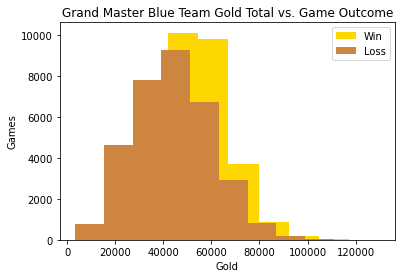

In [79]:
# Histogram on Blue Total Gold for Wins Against Losses- Grand Master

plt.hist(gm_bluewins_df.blueTotalGold, label="Win", color='gold')
plt.hist(gm_blueloss_df.blueTotalGold, label="Loss", color='peru')

plt.legend(loc="upper right")
print(f"Average Gold Total for blue wins: {round(gm_bluewins_df['blueTotalGold'].mean(), 3)}")
print(f"Average Gold Total for blue losses: {round(gm_blueloss_df['blueTotalGold'].mean(), 3)}")
plt.xlabel('Gold')
plt.ylabel('Games')
plt.title('Grand Master Blue Team Gold Total vs. Game Outcome')
plt.savefig('../Images/grandmaster_blue_gold_outcome.png')
plt.show()

Average Gold Total for red wins: 52574.81
Average Gold Total for red losses: 43715.772


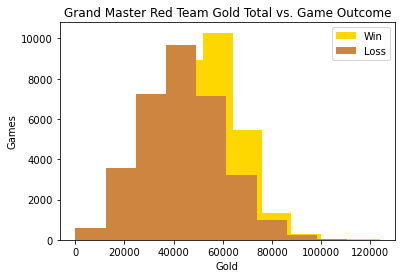

In [80]:
# Histogram on Red Total Gold for Wins Against Losses- Grand Master

plt.hist(gm_redwins_df.redTotalGold, label="Win", color='gold')
plt.hist(gm_redloss_df.redTotalGold, label="Loss", color='peru')

plt.legend(loc="upper right")
print(f"Average Gold Total for red wins: {round(gm_redwins_df['redTotalGold'].mean(), 3)}")
print(f"Average Gold Total for red losses: {round(gm_redloss_df['redTotalGold'].mean(), 3)}")
plt.xlabel('Gold')
plt.ylabel('Games')
plt.title('Grand Master Red Team Gold Total vs. Game Outcome')
plt.savefig('../Images/grandmaster_red_gold_outcome.png')
plt.show()

Average Gold Total for blue wins: 51832.148
Average Gold Total for blue losses: 43889.688


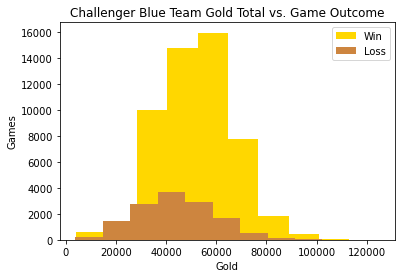

In [81]:
# Histogram on Blue Total Gold for Wins Against Losses- Challenger

plt.hist(ch_bluewins_df.blueTotalGold, label="Win", color='gold')
plt.hist(ch_blueloss_df.blueTotalGold, label="Loss", color='peru')

plt.legend(loc="upper right")
print(f"Average Gold Total for blue wins: {round(ch_bluewins_df['blueTotalGold'].mean(), 3)}")
print(f"Average Gold Total for blue losses: {round(ch_blueloss_df['blueTotalGold'].mean(), 3)}")
plt.xlabel('Gold')
plt.ylabel('Games')
plt.title('Challenger Blue Team Gold Total vs. Game Outcome')
plt.savefig('../Images/challenger_blue_gold_outcome.png')
plt.show()

Average Gold Total for red wins: 52439.301
Average Gold Total for red losses: 43977.91


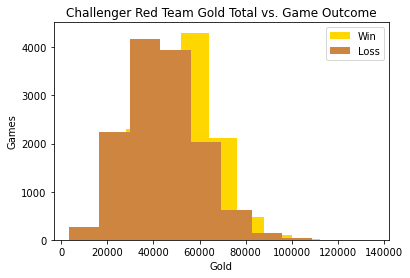

In [82]:
# Histogram on Red Total Gold for Wins Against Losses- Grand Master

plt.hist(ch_redwins_df.redTotalGold, label="Win", color='gold')
plt.hist(ch_redloss_df.redTotalGold, label="Loss", color='peru')

plt.legend(loc="upper right")
print(f"Average Gold Total for red wins: {round(ch_redwins_df['redTotalGold'].mean(), 3)}")
print(f"Average Gold Total for red losses: {round(ch_redloss_df['redTotalGold'].mean(), 3)}")
plt.xlabel('Gold')
plt.ylabel('Games')
plt.title('Challenger Red Team Gold Total vs. Game Outcome')
plt.savefig('../Images/challenger_red_gold_outcome.png')
plt.show()

## Statistical Metrics Per Team & Rank

In [94]:
# MASTER BLUE TEAM
m_blue_df.describe()

,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstInhibitor,blueDragonKills,blueBaronKills,blueTowerKills,blueInhibitorKills,blueWardPlaced,blueWardkills,blueKills,blueDeath,blueAssist,blueChampionDamageDealt,blueTotalGold,blueTotalMinionKills,blueTotalLevel,blueAvgLevel,blueObjectDamageDealt,blueTotalHeal,blueKillingSpree,blueJungleMinionKills,gameDuraton,blueWins
count,107125.000000,107125.000000,107125.000000,107125.000000,107125.000000,107125.000000,107125.000000,107125.000000,107125.000000,107125.000000,107125.000000,107125.000000,107125.000000,107125.000000,107125.000000,107125.000000,107125.000000,107125.000000,107125.00000,107125.000000,107125.000000,107125.000000,107125.000000,107125.000000
mean,0.507025,0.513410,0.236229,0.387715,1.359356,0.297018,4.345475,0.654712,52.017176,18.679841,24.748677,24.748014,39.928980,69067.739193,47762.086273,495.784616,64.490782,12.898156,36955.14203,24189.268593,5.695991,123.237321,1432.977914,0.495132
std,0.499953,0.499822,0.424766,0.487231,1.256974,0.535069,3.401828,0.912283,29.415282,14.149712,13.613333,13.592443,28.955676,37739.056226,16235.025915,176.073797,14.997693,2.999539,26599.00778,15304.953961,3.633737,65.559234,436.506952,0.499979
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3355.000000,0.000000,5.000000,1.000000,0.00000,0.000000,0.000000,0.000000,190.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,32.000000,8.000000,15.000000,15.000000,19.000000,40826.000000,36256.000000,379.000000,55.000000,11.000000,13443.00000,13057.000000,3.000000,82.000000,1121.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,4.000000,0.000000,52.000000,17.000000,24.000000,24.000000,35.000000,63985.000000,47725.000000,511.000000,65.000000,13.000000,32909.00000,21096.000000,5.000000,125.000000,1420.000000,0.000000
75%,1.000000,1.000000,0.000000,1.000000,2.000000,1.000000,7.000000,1.000000,71.000000,27.000000,33.000000,33.000000,53.000000,90732.000000,58789.000000,618.000000,75.000000,15.000000,56625.00000,31881.000000,8.000000,168.000000,1735.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,7.000000,4.000000,11.000000,8.000000,226.000000,118.000000,112.000000,117.000000,256.000000,381484.000000,134323.000000,1514.000000,134.000000,26.800000,164396.00000,239168.000000,31.000000,398.000000,3758.000000,1.000000


In [95]:
# MASTER RED TEAM
m_red_df.describe()

,redFirstBlood,redFirstTower,redFirstBaron,redFirstInhibitor,redDragonKills,redBaronKills,redTowerKills,redInhibitorKills,redWardPlaced,redWardkills,redKills,redDeath,redAssist,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redObjectDamageDealt,redTotalHeal,redKillingSpree,redJungleMinionKills,gameDuraton,redWins
count,107125.000000,107125.000000,107125.000000,107125.000000,107125.000000,107125.000000,107125.000000,107125.000000,107125.000000,107125.000000,107125.000000,107125.000000,107125.000000,107125.000000,107125.000000,107125.000000,107125.000000,107125.000000,107125.000000,107125.000000,107125.000000,107125.000000,107125.000000,107125.000000
mean,0.490707,0.473904,0.260555,0.376476,1.515911,0.330408,4.291463,0.645536,52.099389,18.383487,24.658670,24.833802,39.807365,68789.821620,47875.980285,501.132966,64.695561,12.939112,36884.671888,24547.786763,5.688831,125.359683,1432.977914,0.504868
std,0.499916,0.499321,0.438940,0.484504,1.309275,0.559717,3.426053,0.910702,29.630055,13.947758,13.581255,13.626368,28.805782,37648.964189,16455.077811,180.010409,15.166821,3.033364,27034.549770,15510.255865,3.640699,66.746287,436.506952,0.499979
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,190.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,32.000000,7.000000,15.000000,15.000000,19.000000,40494.000000,36127.000000,382.000000,55.000000,11.000000,12583.000000,13297.000000,3.000000,84.000000,1121.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4.000000,0.000000,52.000000,17.000000,24.000000,24.000000,35.000000,63885.000000,47955.000000,517.000000,66.000000,13.200000,32486.000000,21455.000000,5.000000,128.000000,1420.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,7.000000,1.000000,71.000000,27.000000,33.000000,33.000000,53.000000,90554.000000,59133.000000,627.000000,75.000000,15.000000,57346.000000,32367.000000,8.000000,171.000000,1735.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,7.000000,5.000000,11.000000,10.000000,248.000000,117.000000,116.000000,112.000000,225.000000,341957.000000,141692.000000,1338.000000,145.000000,29.000000,191193.000000,188817.000000,29.000000,488.000000,3758.000000,1.000000


In [96]:
# GRAND MASTER BLUE TEAM
gm_blue_df.describe()

,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstInhibitor,blueDragonKills,blueBaronKills,blueTowerKills,blueInhibitorKills,blueWardPlaced,blueWardkills,blueKills,blueDeath,blueAssist,blueChampionDamageDealt,blueTotalGold,blueTotalMinionKills,blueTotalLevel,blueAvgLevel,blueObjectDamageDealt,blueTotalHeal,blueKillingSpree,blueJungleMinionKills,gameDuraton,blueWins
count,65896.000000,65896.000000,65896.000000,65896.000000,65896.000000,65896.000000,65896.000000,65896.000000,65896.000000,65896.000000,65896.000000,65896.000000,65896.000000,65896.000000,65896.000000,65896.000000,65896.000000,65896.000000,65896.000000,65896.000000,65896.000000,65896.000000,65896.000000,65896.000000
mean,0.506966,0.515873,0.234400,0.381192,1.339034,0.295117,4.319549,0.645730,53.617564,19.819898,24.897262,24.874044,41.304449,70108.222684,48098.425215,498.855333,64.953017,12.990603,36882.201241,24462.290974,5.738967,122.692303,1427.961591,0.495614
std,0.499955,0.499752,0.423626,0.485683,1.253090,0.534107,3.357334,0.909908,31.231714,15.003227,13.655565,13.646277,29.963753,37622.059339,16033.269430,179.961166,14.812905,2.962581,26660.571669,15150.270579,3.672277,67.143071,429.784566,0.499985
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3361.000000,0.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,132.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,33.000000,8.000000,15.000000,15.000000,20.000000,42155.500000,36753.750000,379.000000,55.000000,11.000000,13135.750000,13446.750000,3.000000,81.000000,1121.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,4.000000,0.000000,54.000000,18.000000,24.000000,24.000000,36.000000,65111.000000,48101.000000,515.000000,66.000000,13.200000,32840.500000,21448.000000,5.000000,126.000000,1414.000000,0.000000
75%,1.000000,1.000000,0.000000,1.000000,2.000000,1.000000,7.000000,1.000000,74.000000,29.000000,33.000000,33.000000,55.000000,91394.250000,58948.250000,623.000000,75.000000,15.000000,56632.250000,32149.000000,8.000000,169.000000,1724.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,7.000000,4.000000,11.000000,9.000000,230.000000,118.000000,112.000000,102.000000,256.000000,326427.000000,130009.000000,1315.000000,141.000000,28.200000,167692.000000,261707.000000,31.000000,400.000000,3301.000000,1.000000


In [97]:
# GRAND MASTER RED TEAM
gm_red_df.describe()

,redFirstBlood,redFirstTower,redFirstBaron,redFirstInhibitor,redDragonKills,redBaronKills,redTowerKills,redInhibitorKills,redWardPlaced,redWardkills,redKills,redDeath,redAssist,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redObjectDamageDealt,redTotalHeal,redKillingSpree,redJungleMinionKills,gameDuraton,redWins
count,65896.000000,65896.000000,65896.000000,65896.000000,65896.000000,65896.000000,65896.000000,65896.000000,65896.000000,65896.00000,65896.000000,65896.000000,65896.000000,65896.000000,65896.000000,65896.000000,65896.000000,65896.000000,65896.000000,65896.000000,65896.000000,65896.000000,65896.000000,65896.000000
mean,0.490925,0.472001,0.256844,0.369491,1.505327,0.325695,4.256996,0.632390,53.786421,19.48833,24.785920,24.981926,41.146868,69860.214004,48184.144060,504.256966,65.149706,13.029941,36596.842084,24847.151208,5.730348,124.395229,1427.961591,0.504386
std,0.499921,0.499219,0.436896,0.482671,1.308376,0.557355,3.365291,0.898482,31.459582,14.77296,13.631773,13.673713,29.915931,37720.746933,16227.499768,183.738764,14.935247,2.987049,26882.265764,15326.178370,3.675253,67.937351,429.784566,0.499985
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,132.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,33.000000,8.00000,15.000000,15.000000,20.000000,41824.750000,36718.000000,381.000000,56.000000,11.200000,12271.750000,13689.000000,3.000000,83.000000,1121.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4.000000,0.000000,54.000000,18.00000,24.000000,24.000000,36.000000,64709.000000,48136.000000,521.000000,66.000000,13.200000,32094.500000,21879.000000,5.000000,128.000000,1414.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,7.000000,1.000000,74.000000,29.00000,33.000000,33.000000,55.000000,91243.250000,59205.000000,632.000000,76.000000,15.200000,57075.000000,32681.000000,8.000000,171.000000,1724.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,6.000000,4.000000,11.000000,9.000000,226.000000,117.00000,102.000000,112.000000,229.000000,325940.000000,123884.000000,1287.000000,139.000000,27.800000,197135.000000,206758.000000,29.000000,417.000000,3301.000000,1.000000


In [98]:
# CHALLENGER BLUE TEAM
ch_blue_df.describe()

,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstInhibitor,blueDragonKills,blueBaronKills,blueTowerKills,blueInhibitorKills,blueWardPlaced,blueWardkills,blueKills,blueDeath,blueAssist,blueChampionDamageDealt,blueTotalGold,blueTotalMinionKills,blueTotalLevel,blueAvgLevel,blueObjectDamageDealt,blueTotalHeal,blueKillingSpree,blueJungleMinionKills,gameDuraton,blueWins
count,26904.000000,26904.000000,26904.000000,26904.000000,26904.000000,26904.000000,26904.000000,26904.000000,26904.000000,26904.000000,26904.000000,26904.000000,26904.000000,26904.000000,26904.000000,26904.000000,26904.000000,26904.000000,26904.000000,26904.000000,26904.000000,26904.000000,26904.000000,26904.000000
mean,0.503531,0.525610,0.244090,0.367120,1.389719,0.307018,4.397562,0.619871,58.640351,22.330137,24.189414,24.180568,39.986396,69746.341882,48169.129906,520.446588,65.024234,13.004847,38393.883066,25050.636225,5.554193,129.586939,1448.653657,0.500074
std,0.499997,0.499353,0.429554,0.482029,1.247393,0.537140,3.327761,0.901444,31.351606,15.502273,12.954288,13.042858,27.770103,35763.374883,15476.235577,175.971130,14.062380,2.812476,26335.664719,15112.644802,3.493384,64.662998,422.577288,0.500009
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3704.000000,0.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,190.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,38.000000,11.000000,15.000000,15.000000,20.000000,43205.250000,37191.000000,409.000000,56.000000,11.200000,15608.000000,14105.500000,3.000000,90.000000,1152.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,4.000000,0.000000,58.000000,21.000000,23.000000,23.000000,36.000000,65013.000000,48104.000000,534.000000,66.000000,13.200000,34940.500000,21990.000000,5.000000,131.000000,1435.000000,1.000000
75%,1.000000,1.000000,0.000000,1.000000,2.000000,1.000000,7.000000,1.000000,79.000000,32.000000,32.000000,32.000000,53.000000,90159.500000,58656.500000,639.000000,75.000000,15.000000,57829.250000,32725.750000,7.000000,173.000000,1738.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,7.000000,4.000000,11.000000,9.000000,230.000000,109.000000,99.000000,102.000000,238.000000,333957.000000,121920.000000,1267.000000,132.000000,26.400000,167692.000000,162442.000000,29.000000,402.000000,3301.000000,1.000000


In [99]:
# CHALLENGER RED TEAM
ch_red_df.describe()

,redFirstBlood,redFirstTower,redFirstBaron,redFirstInhibitor,redDragonKills,redBaronKills,redTowerKills,redInhibitorKills,redWardPlaced,redWardkills,redKills,redDeath,redAssist,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redObjectDamageDealt,redTotalHeal,redKillingSpree,redJungleMinionKills,gameDuraton,redWins
count,26904.000000,26904.000000,26904.000000,26904.000000,26904.000000,26904.000000,26904.000000,26904.000000,26904.000000,26904.000000,26904.000000,26904.000000,26904.000000,26904.000000,26904.000000,26904.000000,26904.000000,26904.000000,26904.000000,26904.000000,26904.000000,26904.000000,26904.000000,26904.000000
mean,0.494462,0.462719,0.266615,0.348536,1.563857,0.336307,4.255910,0.584932,58.832255,21.912095,24.101175,24.268585,39.800736,69528.259441,48207.976398,526.337682,65.213165,13.042633,37648.115336,25505.503085,5.541704,130.468704,1448.653657,0.499926
std,0.499979,0.498617,0.442197,0.476515,1.299117,0.559479,3.325612,0.870919,31.621680,15.275608,13.024843,12.972992,27.722135,35866.105905,15627.093121,178.994313,14.105689,2.821138,26509.187910,15330.689295,3.494662,64.618529,422.577288,0.500009
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3340.000000,0.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,190.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,38.000000,10.000000,15.000000,15.000000,20.000000,43068.250000,37127.250000,412.000000,56.000000,11.200000,14454.000000,14499.750000,3.000000,91.000000,1152.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4.000000,0.000000,58.000000,20.000000,23.000000,23.000000,35.000000,64655.000000,48037.000000,541.000000,66.000000,13.200000,33385.000000,22377.000000,5.000000,132.000000,1435.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,7.000000,1.000000,79.000000,31.000000,32.000000,32.000000,53.000000,89811.750000,58719.250000,648.000000,75.000000,15.000000,57690.000000,33217.250000,7.000000,174.000000,1738.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,6.000000,4.000000,11.000000,7.000000,202.000000,117.000000,102.000000,99.000000,229.000000,359184.000000,135299.000000,1443.000000,132.000000,26.400000,152319.000000,188603.000000,29.000000,432.000000,3301.000000,1.000000


## Include 0.4 Correlation Values In Chart

### Master

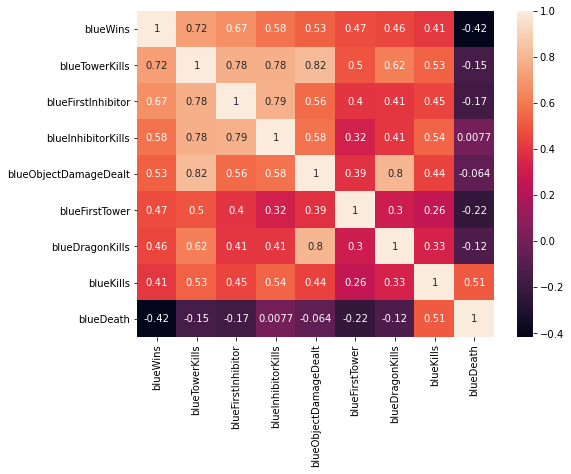

In [86]:
# Correlation Matrix For Master Elo Blue Team
plt.figure(figsize=(8,6))
m_blue_corr = m_blue_df.corr()['blueWins'][:].sort_values(axis=0, ascending=False)

# Gather columns/data that has a correlation value that is statistically significant
m_blue_corr_cols = [x for x,corr in m_blue_corr.iteritems() if abs(corr)>0.4]

#sns.set(font_scale = 1)
sns.heatmap(m_blue_df[m_blue_corr_cols].corr(), annot=True)
plt.savefig('../Images/master_corr_matrix_blue_2.png', bbox_inches='tight')

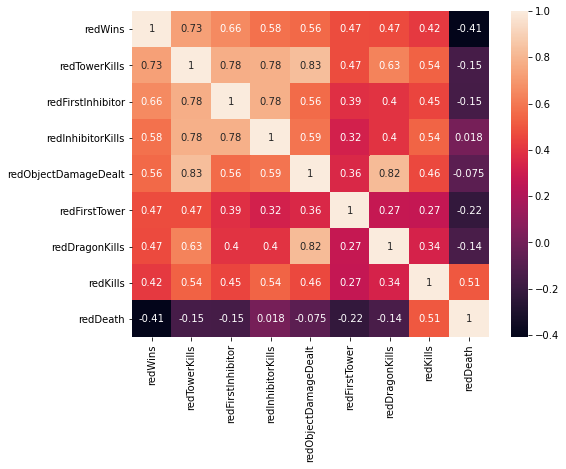

In [87]:
# Correlation Matrix For Master Elo Red Team
plt.figure(figsize=(8,6))
m_red_corr = m_red_df.corr()['redWins'][:].sort_values(axis=0, ascending=False)

# Gather columns/data that has a correlation value that is statistically significant
m_red_corr_cols = [x for x,corr in m_red_corr.iteritems() if abs(corr)>0.4]

#sns.set(font_scale = 1)
sns.heatmap(m_red_df[m_red_corr_cols].corr(), annot=True)
plt.savefig('../Images/master_corr_matrix_red_2.png', bbox_inches='tight')

### Grand Master

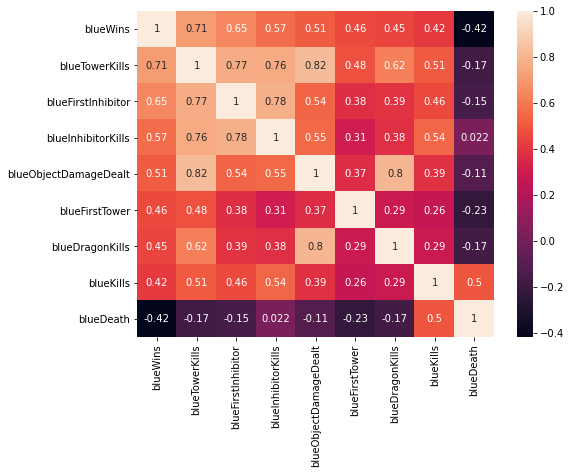

In [90]:
# Correlation Matrix For Master Elo Blue Team
plt.figure(figsize=(8,6))
gm_blue_corr = gm_blue_df.corr()['blueWins'][:].sort_values(axis=0, ascending=False)

# Gather columns/data that has a correlation value that is statistically significant
gm_blue_corr_cols = [x for x,corr in gm_blue_corr.iteritems() if abs(corr)>0.4]

#sns.set(font_scale = 1)
sns.heatmap(gm_blue_df[gm_blue_corr_cols].corr(), annot=True)
plt.savefig('../Images/grandmaster_corr_matrix_blue_2.png', bbox_inches='tight')

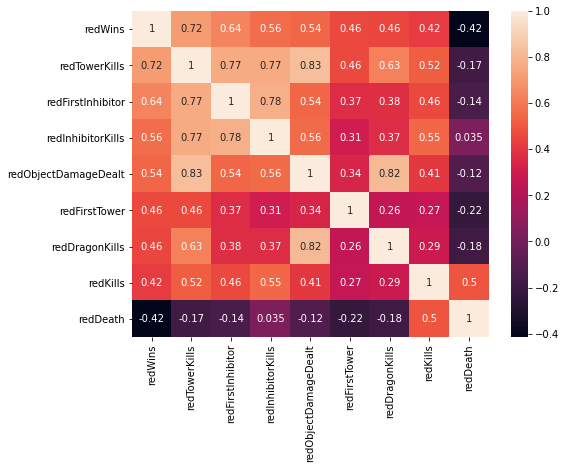

In [91]:
# Correlation Matrix For Master Elo Red Team
plt.figure(figsize=(8,6))
gm_red_corr = gm_red_df.corr()['redWins'][:].sort_values(axis=0, ascending=False)

# Gather columns/data that has a correlation value that is statistically significant
gm_red_corr_cols = [x for x,corr in gm_red_corr.iteritems() if abs(corr)>0.4]

#sns.set(font_scale = 1)
sns.heatmap(gm_red_df[gm_red_corr_cols].corr(), annot=True)
plt.savefig('../Images/grandmaster_corr_matrix_red_2.png', bbox_inches='tight')

### Challenger

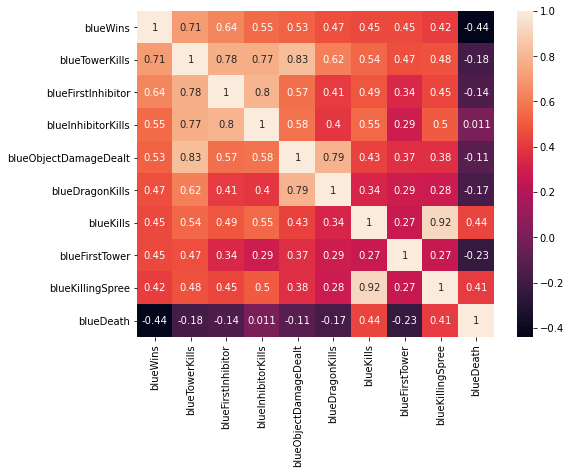

In [92]:
# Correlation Matrix For Master Elo Blue Team
plt.figure(figsize=(8,6))
ch_blue_corr = ch_blue_df.corr()['blueWins'][:].sort_values(axis=0, ascending=False)

# Gather columns/data that has a correlation value that is statistically significant
ch_blue_corr_cols = [x for x,corr in ch_blue_corr.iteritems() if abs(corr)>0.4]

#sns.set(font_scale = 1)
sns.heatmap(ch_blue_df[ch_blue_corr_cols].corr(), annot=True)
plt.savefig('../Images/challenger_corr_matrix_blue_2.png', bbox_inches='tight')

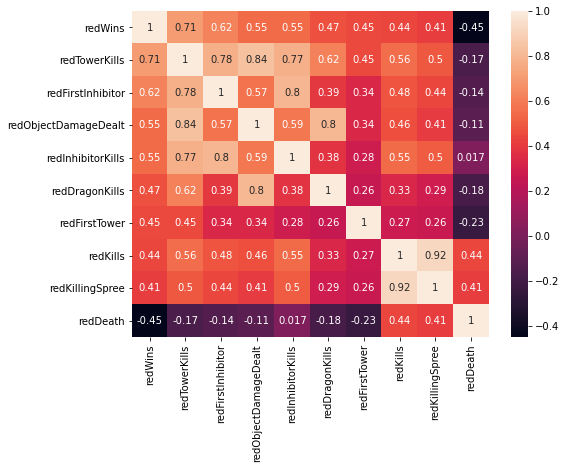

In [93]:
# Correlation Matrix For Master Elo Red Team
plt.figure(figsize=(8,6))
ch_red_corr = ch_red_df.corr()['redWins'][:].sort_values(axis=0, ascending=False)

# Gather columns/data that has a correlation value that is statistically significant
ch_red_corr_cols = [x for x,corr in ch_red_corr.iteritems() if abs(corr)>0.4]

#sns.set(font_scale = 1)
sns.heatmap(ch_red_df[ch_red_corr_cols].corr(), annot=True)

plt.savefig('../Images/challenger_corr_matrix_red_2.png', bbox_inches='tight')